In [1]:
import numpy as np
import pandas as pd
import datatable as dt
import matplotlib.pyplot as plt
import os

In [2]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

In [3]:
os.getcwd()

'C:\\Users\\bahad\\GitHub\\IE48B\\Homework1'

In [4]:
Folder_path="UWave-20211030T180805Z-001/UWave/"

In [5]:
x_train, y_train, z_train =pd.read_csv(f"{Folder_path}uWaveGestureLibrary_X_TRAIN.csv"),\
                           pd.read_csv(f"{Folder_path}uWaveGestureLibrary_Y_TRAIN.csv"),\
                           pd.read_csv(f"{Folder_path}uWaveGestureLibrary_Z_TRAIN.csv")

In [6]:
class_indicator=pd.DataFrame(x_train.iloc[:, 0])

In [7]:
acc_x=x_train.iloc[:,1:].T.cumsum().T.add_suffix("_X")
acc_y=y_train.iloc[:,1:].T.cumsum().T.add_suffix("_Y")
acc_z=z_train.iloc[:,1:].T.cumsum().T.add_suffix("_Z")

In [8]:
dataframes=[class_indicator, acc_x, acc_y, acc_z]

In [9]:
all_acc=pd.concat(dataframes, axis=1)

## Gesture Filter

In [10]:
def filter_data(ind_data, x_data, y_data, z_data, index):

    x_concat=pd.concat([ind_data,x_data], axis=1)
    x_filtered=x_concat[x_concat.iloc[:, 0]== index].iloc[:, 1:]
    
    y_concat=pd.concat([ind_data,y_data], axis=1)
    y_filtered=y_concat[y_concat.iloc[:, 0]== index].iloc[:, 1:]
    
    z_concat=pd.concat([ind_data,z_data], axis=1)
    z_filtered=z_concat[z_concat.iloc[:, 0]== index].iloc[:, 1:]
    
    return x_filtered, y_filtered, z_filtered

# Part 1: Display

In [11]:
import plotly.express as px

## Graph Display Function

In [12]:
def print_graph(x ,y, z, no):
    fig = pyplot.figure()
    fig.set_size_inches(18.5, 10.5)
    ax = Axes3D(fig)

    ax.scatter(x, y, z,)
    ax.set_title(f"Geture {no} Example")
    ax.set_xlabel("X axis")
    ax.set_ylabel("Y axis")
    ax.set_zlabel("Z axis")
    
    return pyplot.show()

## Gesture 1

In [13]:
x_1, y_1, z_1 = filter_data(class_indicator, acc_x, acc_y, acc_z, 1)

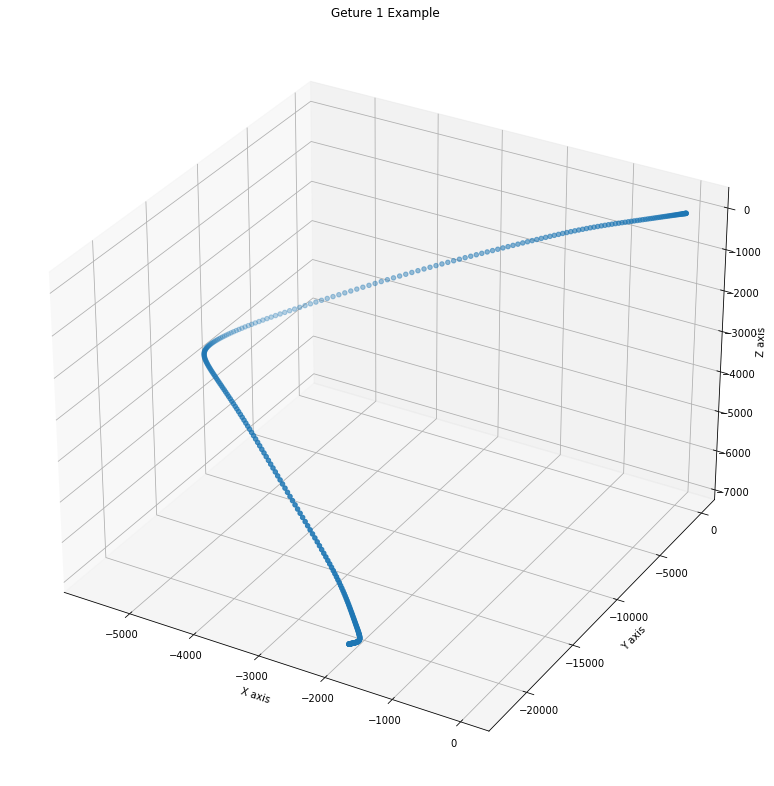

In [14]:
print_graph(x_1.T.cumsum().iloc[:, 0], y_1.T.cumsum().iloc[:, 0], z_1.T.cumsum().iloc[:, 0], 1)

## Plotly Plot

In order to analyze which value (velocity or position) was analyzed by looking with an interactive plot.

In [15]:
# fig1=px.scatter_3d(x=x_1.T.cumsum().iloc[:, 0], y=y_1.T.cumsum().iloc[:, 0], z=z_1.T.cumsum().iloc[:, 0],
#              labels=dict(x="X Axis", y="Y Axis", z="Z Axis"), title="Gesture 1 Example")
# fig1.update_traces(marker=dict(size=4,opacity=0.4))

## Gesture 2

In [16]:
x_2, y_2, z_2 = filter_data(class_indicator, acc_x, acc_y, acc_z, 2)

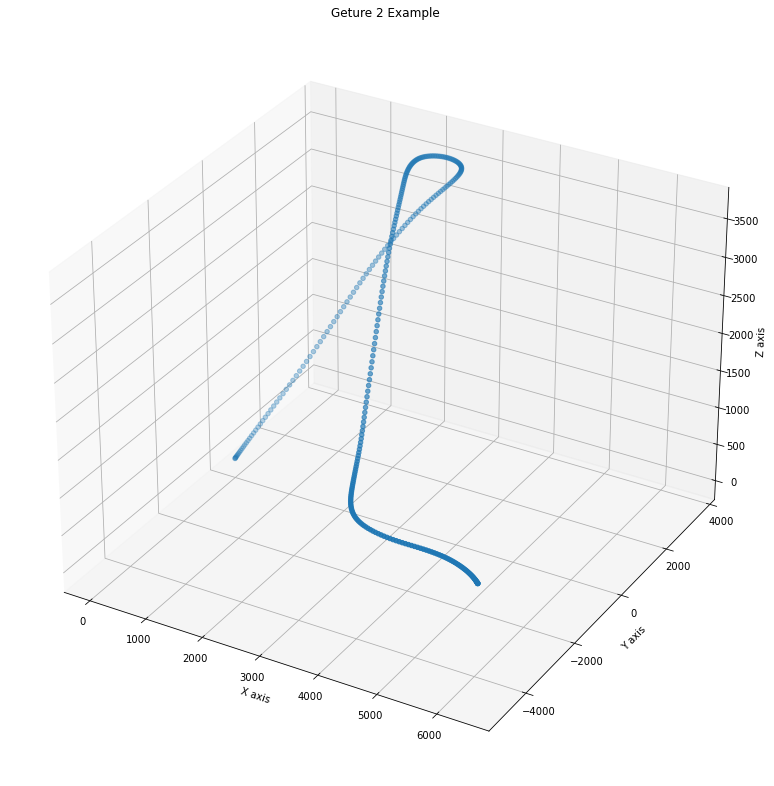

In [17]:
print_graph(x_2.T.cumsum().iloc[:, 0], y_2.T.cumsum().iloc[:, 0], z_2.T.cumsum().iloc[:, 0], 2)

## Gesture 3

In [18]:
x_3, y_3, z_3 = filter_data(class_indicator, acc_x, acc_y, acc_z, 3)

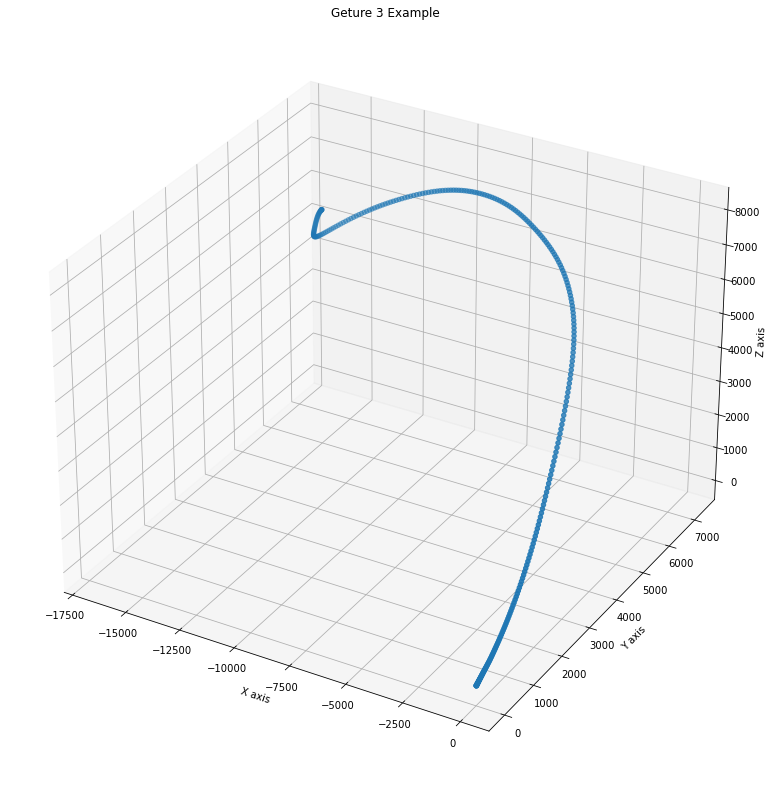

In [19]:
print_graph(x_3.T.cumsum().iloc[:, 0], y_3.T.cumsum().iloc[:, 0], z_3.T.cumsum().iloc[:, 0], 3)

## Gesture 4

In [20]:
x_4, y_4, z_4 = filter_data(class_indicator, acc_x, acc_y, acc_z, 4)

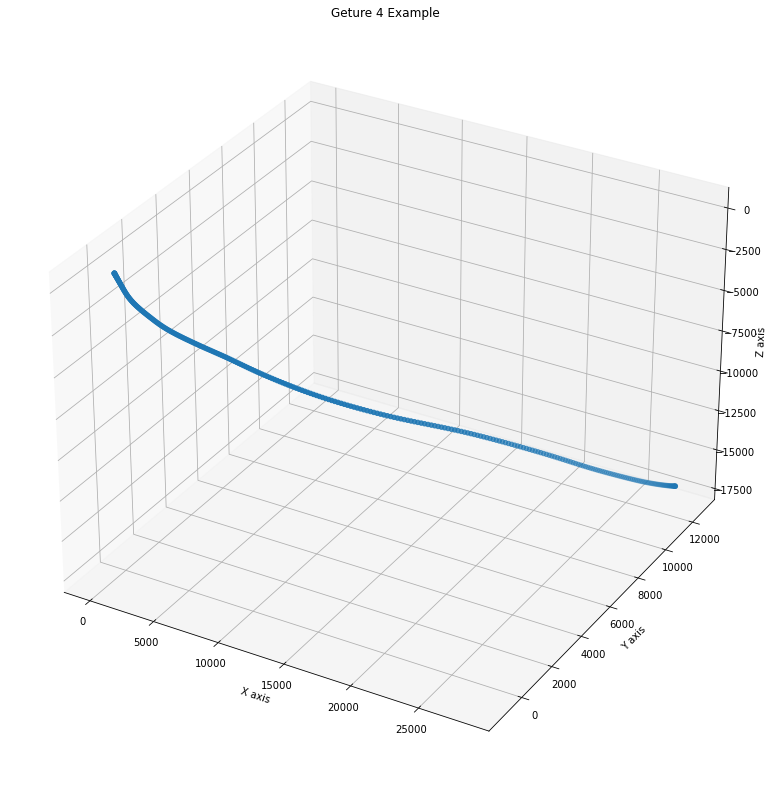

In [21]:
print_graph(x_4.T.cumsum().iloc[:, 0], y_4.T.cumsum().iloc[:, 0], z_4.T.cumsum().iloc[:, 0], 4)

## Gesture 5

In [22]:
x_5, y_5, z_5 = filter_data(class_indicator, acc_x, acc_y, acc_z, 5)

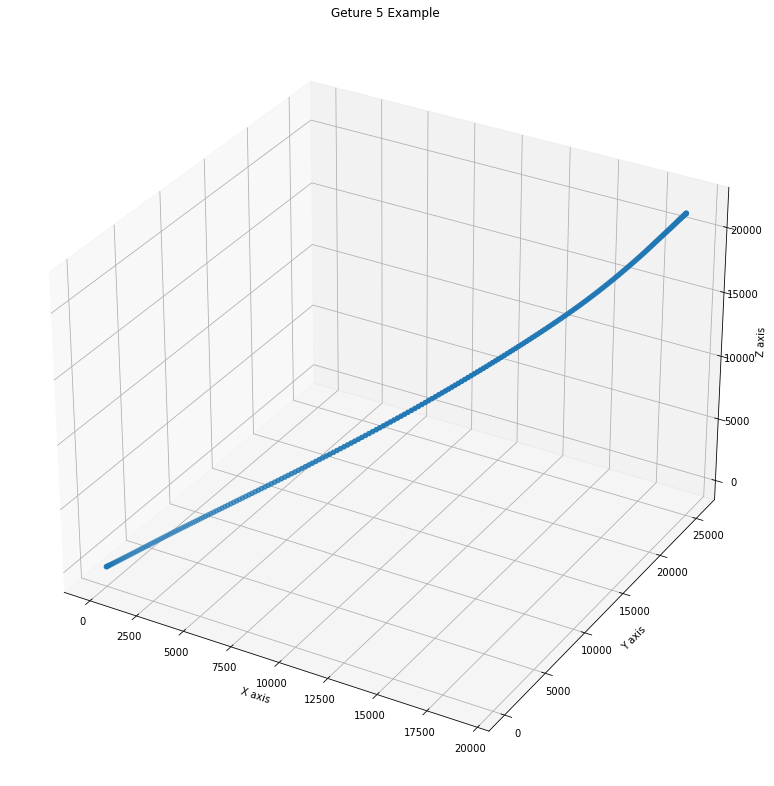

In [23]:
print_graph(x_5.T.cumsum().iloc[:, 0], y_5.T.cumsum().iloc[:, 0], z_5.T.cumsum().iloc[:, 0], 5)

## Gesture 6

In [24]:
x_6, y_6, z_6 = filter_data(class_indicator, acc_x, acc_y, acc_z, 6)

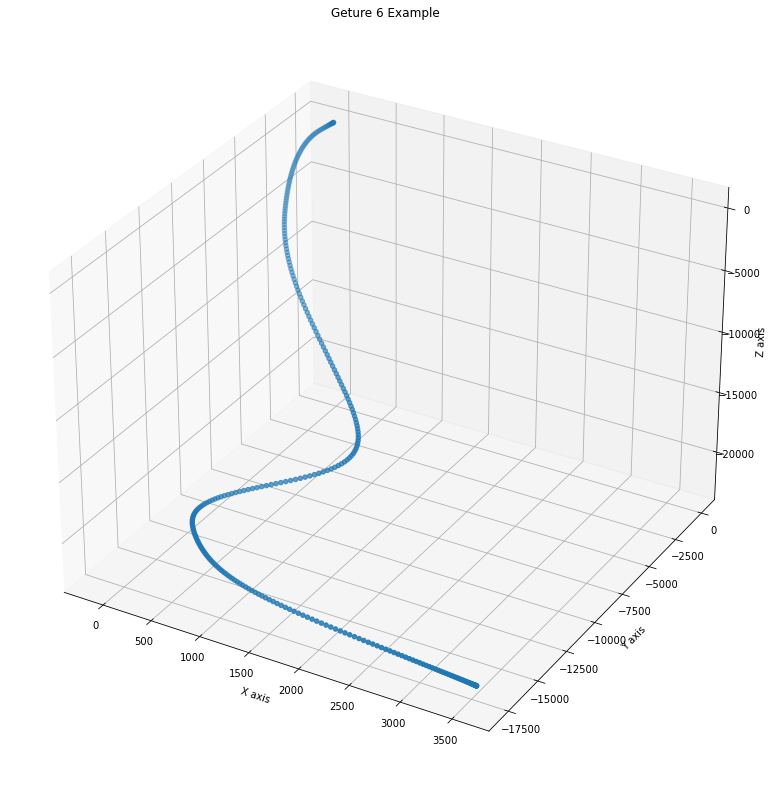

In [25]:
print_graph(x_6.T.cumsum().iloc[:, 0], y_6.T.cumsum().iloc[:, 0], z_6.T.cumsum().iloc[:, 0], 6)

## Gesture 7

In [26]:
x_7, y_7, z_7 = filter_data(class_indicator, acc_x, acc_y, acc_z, 7)

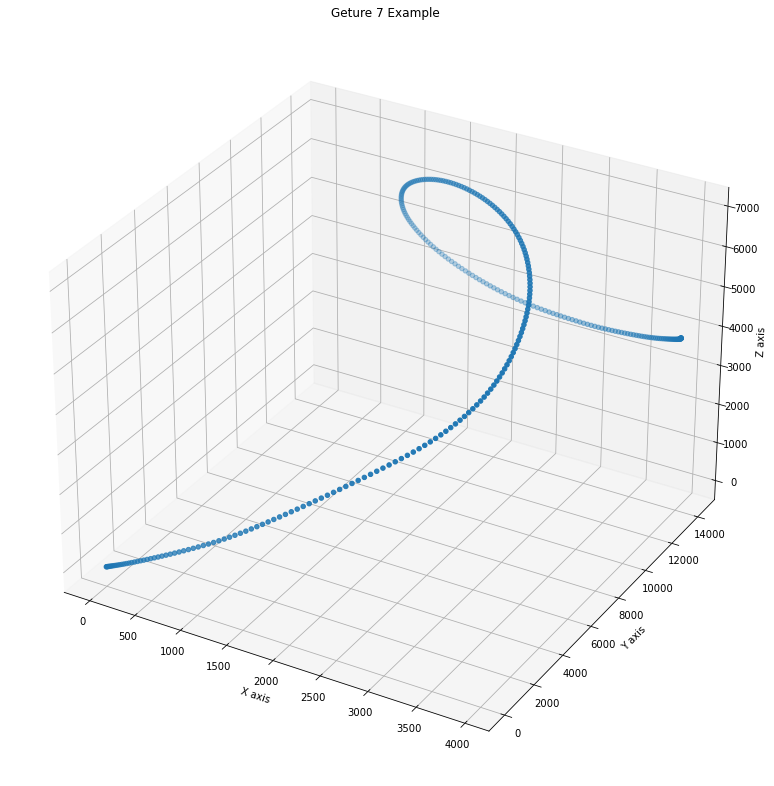

In [27]:
print_graph(x_7.T.cumsum().iloc[:, 0], y_7.T.cumsum().iloc[:, 0], z_7.T.cumsum().iloc[:, 0], 7)

## Gesture 8

In [28]:
x_8, y_8, z_8 = filter_data(class_indicator, acc_x, acc_y, acc_z, 8)

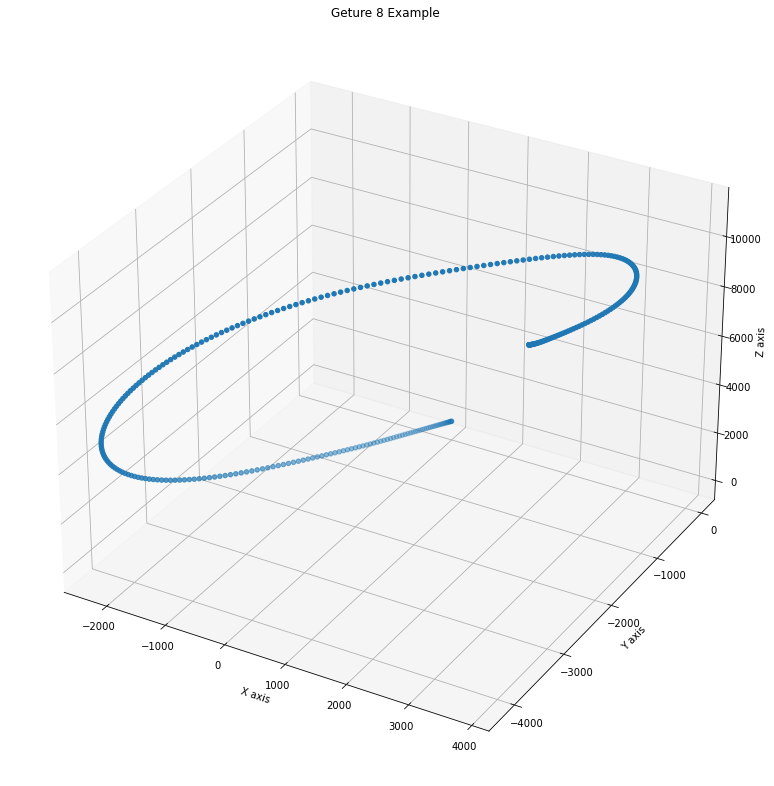

In [29]:
print_graph(x_8.T.cumsum().iloc[:, 0], y_8.T.cumsum().iloc[:, 0], z_8.T.cumsum().iloc[:, 0], 8)

# Part 2: 2 Representation Method

2 Different will be tried to represent existing dataset.

In [30]:
from saxpy.znorm import znorm
from saxpy.sax import ts_to_string
from saxpy.paa import paa
from saxpy.alphabet import cuts_for_asize

# Piecewise Aggregate Approximation Function

There is 315 different time point in each axis, so it is hard to observe and analyze it by using Symbolic Aggregate approXimation(SAX) without Piecewise Aggregate Approximation(PAA). In this manner, SAX will be used with PAA in order to understand the symbols more easily. In addition, each axis will be constructed seperately.

In [31]:
def string_with_paa(dataset):
    length = dataset.shape[0]
    shape_information=[]
    value_information=[]
    
    for i in range(length):
        current_values=np.array(dataset.iloc[i, :])
        dat_znorm = znorm(current_values) # Normalized Data to easily control understand how to symbols are selected
        dat_paa = paa(current_values, 9) # Similar to dimension Reduction, Piecewise Aggregate Approximation (PAA) is used to get
                                     # a visiable result
        dat_zpaa= paa(dat_znorm, 9)
        value_information.append(list(dat_paa))
    
        strings=ts_to_string(dat_zpaa, cuts_for_asize(8))
        shape_information.append(list(strings))
            
    return shape_information, value_information

In [32]:
def majority_voting(dt):
    final_vote=[]
    for i in range(dt.shape[0]):
        if(dt.iloc[i,0]==dt.iloc[i,1]):
            final_vote.append(dt.iloc[i,0])
            
        elif(dt.iloc[i,0]==dt.iloc[i,2]):
            final_vote.append(dt.iloc[i,0])
            
        elif(dt.iloc[i,1]==dt.iloc[i,2]):
            final_vote.append(dt.iloc[i,1])
        
        else:
            mean_vote=round(((ord(dt.iloc[i,0])-96)+(ord(dt.iloc[i,1])-96)+(ord(dt.iloc[i,2])-96))/3)
            final_vote.append(chr(mean_vote+96))
    return final_vote

## Gesture 1 SAX with PAA

In [33]:
x_string_1, x_values_1=string_with_paa(x_1)
y_string_1, y_values_1=string_with_paa(y_1)
z_string_1, z_values_1=string_with_paa(z_1)

In [34]:
string_data_1 = [pd.DataFrame({"X":x_string_1[i], "Y":y_string_1[i], "Z":z_string_1[i]}) for i in range(x_1.shape[0])]

In [35]:
value_data_1 = [pd.DataFrame({"X":x_values_1[i], "Y":y_values_1[i], "Z":z_values_1[i]}) for i in range(x_1.shape[0])]

### Hard Voting 

In [36]:
for i in range(x_1.shape[0]):
    string_data_1[i]["hard_voting"]=majority_voting(string_data_1[i])

## Visual Control Gesture 1

One example implementation for new lines will be demonstrated at below. Remaning will be added to visualitation function in order to reduce repated codes for other Gestures.

In [37]:
def visualization(origin, created, gesture_no, ax_code, id_value):
    """ 
    x value is represented by 0
    y value is represented by 1
    z value is represented by 2
    id_value represent which item is selected(in sequence) in filtered dataset by gesture class information(V1 in intial data)
    """
    key_values = {"X": 0, "Y": 1, "Z":2}
    
    ax_sequence=key_values.get(ax_code)
    
    location=pd.DataFrame(origin.iloc[id_value, :]).reset_index(drop=True) #
    location.set_axis(["original_values"], axis=1, inplace=True)
    location.index+=1

    obtanied_locations=pd.DataFrame(created[id_value].iloc[:, ax_sequence])
    obtanied_locations.set_axis(["PAA_value"], axis=1, inplace=True)
    obtanied_locations.index+=1
    obtanied_locations.index*=35

    mergedDf = pd.merge(location, obtanied_locations, how="left", left_index=True, right_index=True)
    mergedDf.PAA_value.fillna(method="bfill", inplace=True)
    
    plt.figure(figsize=(14, 8)) 
    plt.plot(mergedDf["original_values"], label="True Values")
    plt.plot(mergedDf["PAA_value"], label="PAA Values")
    plt.title(f"{ax_code} axis of {gesture_no}. Gesture with PAA(SAX) \n({id_value+1}. Time Series in Gesture)")
    
    return(mergedDf)

### Example Dataframe Construction

In [38]:
example_x=pd.DataFrame(x_1.iloc[0, :]).reset_index(drop=True)
example_x.set_axis(["X_original"], axis=1, inplace=True)
example_x.index+=1

In [39]:
obtanied_x=pd.DataFrame(value_data_1[0].iloc[:, 0])
obtanied_x.set_axis(["X_PAA"], axis=1, inplace=True)
obtanied_x.index+=1
obtanied_x.index*=35

In [40]:
mergedDf = pd.merge(example_x, obtanied_x, how="left", left_index=True, right_index=True)

In [41]:
mergedDf.head(15)

,X_original,X_PAA
1,-0.791447,NaN
2,-1.582894,NaN
3,-2.378767,NaN
4,-3.188832,NaN
5,-4.038062,NaN
6,-4.941527,NaN
7,-5.872673,NaN
8,-6.823277,NaN
9,-7.773880,NaN
10,-8.724483,NaN


### Fill of Na Values

In [42]:
mergedDf.X_PAA.fillna(method="bfill", inplace=True)

In [43]:
mergedDf.head(15)

,X_original,X_PAA
1,-0.791447,-16.398346
2,-1.582894,-16.398346
3,-2.378767,-16.398346
4,-3.188832,-16.398346
5,-4.038062,-16.398346
6,-4.941527,-16.398346
7,-5.872673,-16.398346
8,-6.823277,-16.398346
9,-7.773880,-16.398346
10,-8.724483,-16.398346


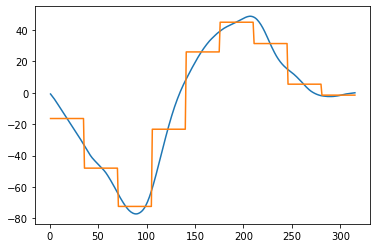

In [44]:
plt.plot(mergedDf["X_original"], label="True Values")
plt.plot(mergedDf["X_PAA"], label="PAA Values")

After showing each step, other pictures will be obtained by using visualization function.

## Visualization by function

All Gestures' axes will be controlled for 1 item in order to observe any problem for a specific gesture(like rapid changes). The main control of this is to understand the performance of the PAA in one dimension. The general performance of the function will be determined after controlling the second alternative on one axis visualization.

### X axis

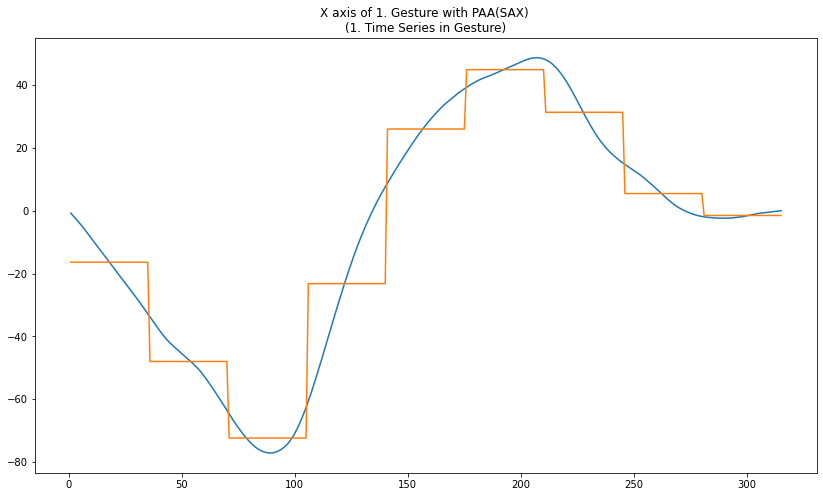

In [45]:
X_1_0=visualization(x_1, value_data_1, 1, "X", 0) #Returned Dataset Represent the required dataframe, X axis, 1. Gesture, 0.item

### Y axis

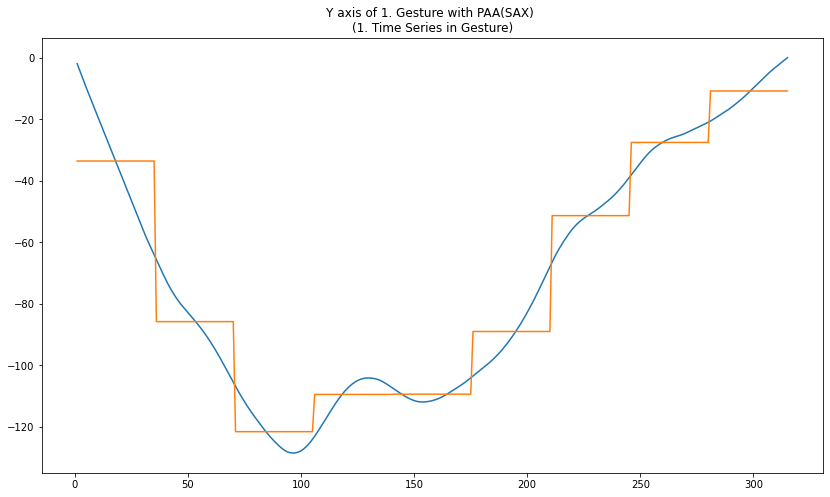

In [46]:
Y_1_0=visualization(y_1, value_data_1, 1, "Y", 0) #Returned Dataset Represent the required dataframe, Y axis, 1. Gesture, 0.item

### Z axis

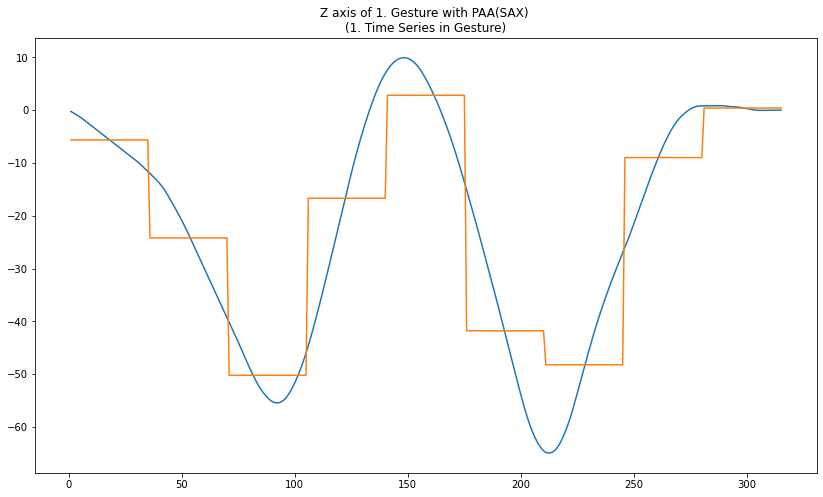

In [47]:
Z_1_0=visualization(z_1, value_data_1, 1, "Z", 0) #Returned Dataset Represent the required dataframe, Z axis, 1. Gesture, 0.item

## Gesture 2 SAX with PAA

In [48]:
x_string_2, x_values_2=string_with_paa(x_2)
y_string_2, y_values_2=string_with_paa(y_2)
z_string_2, z_values_2=string_with_paa(z_2)

In [49]:
string_data_2 = [pd.DataFrame({"X":x_string_2[i], "Y":y_string_2[i], "Z":z_string_2[i]}) for i in range(x_2.shape[0])]

In [50]:
value_data_2 = [pd.DataFrame({"X":x_values_2[i], "Y":y_values_2[i], "Z":z_values_2[i]}) for i in range(x_2.shape[0])]

### Hard Voting 

In [51]:
for i in range(x_2.shape[0]):
    string_data_2[i]["hard_voting"]=majority_voting(string_data_2[i])

### X axis

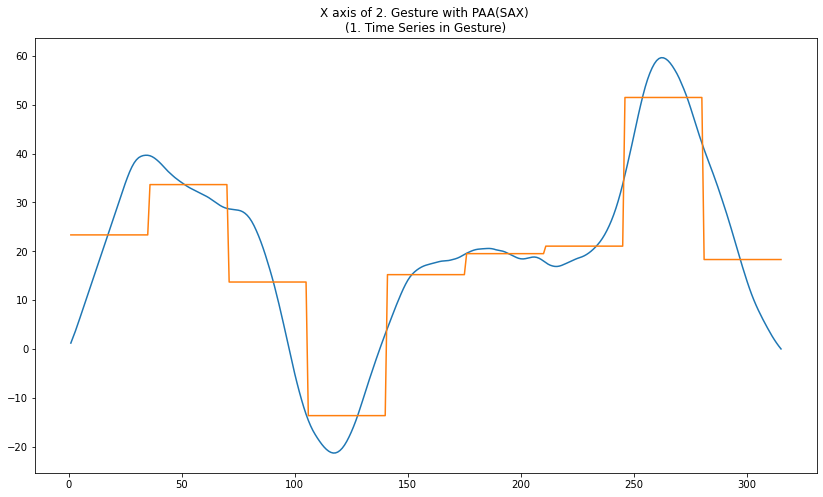

In [52]:
X_2_0=visualization(x_2, value_data_2, 2, "X", 0) #Returned Dataset Represent the required dataframe, X axis, 2. Gesture, 0.item

### Y axis

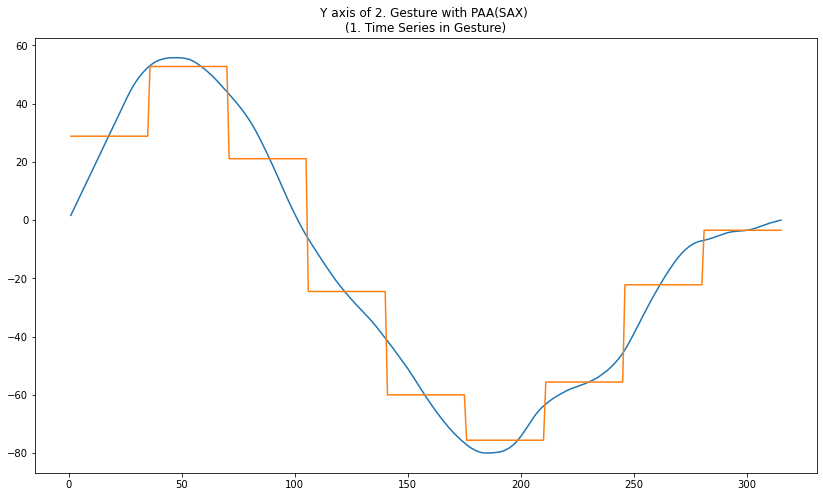

In [53]:
Y_2_0=visualization(y_2, value_data_2, 2, "Y", 0) #Returned Dataset Represent the required dataframe, Y axis, 2. Gesture, 0.item

### Z axis

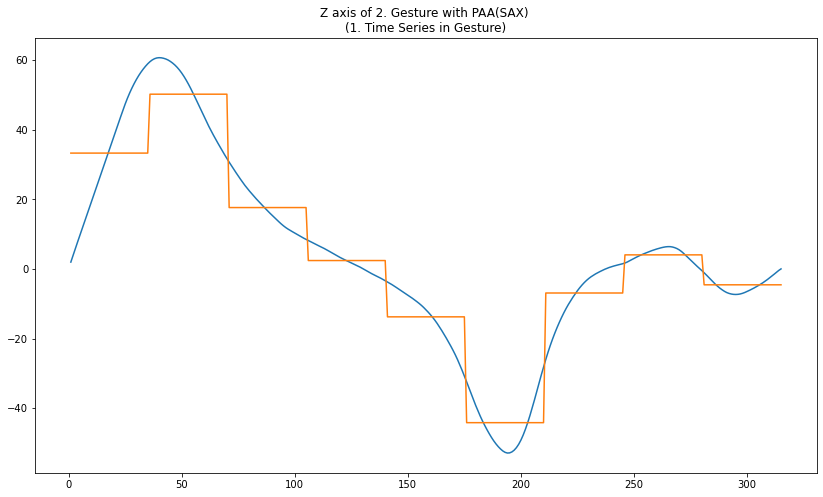

In [54]:
Z_2_0=visualization(z_2, value_data_2, 2, "Z", 0) #Returned Dataset Represent the required dataframe, Z axis, 2. Gesture, 0.item

## Gesture 3 SAX with PAA

In [55]:
x_string_3, x_values_3=string_with_paa(x_3)
y_string_3, y_values_3=string_with_paa(y_3)
z_string_3, z_values_3=string_with_paa(z_3)

In [56]:
string_data_3 = [pd.DataFrame({"X":x_string_3[i], "Y":y_string_3[i], "Z":z_string_3[i]}) for i in range(x_3.shape[0])]

In [57]:
value_data_3 = [pd.DataFrame({"X":x_values_3[i], "Y":y_values_3[i], "Z":z_values_3[i]}) for i in range(x_3.shape[0])]

### Hard Voting 

In [58]:
for i in range(x_3.shape[0]):
    string_data_3[i]["hard_voting"]=majority_voting(string_data_3[i])

### X axis

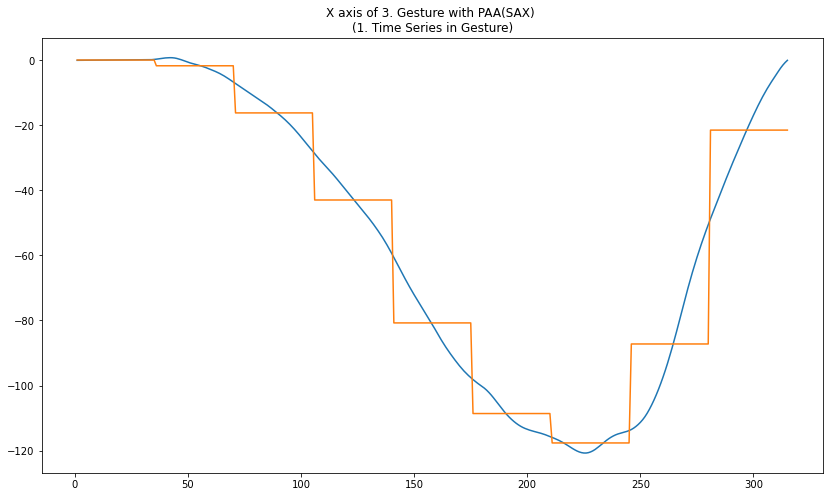

In [59]:
X_3_0=visualization(x_3, value_data_3, 3, "X", 0) #Returned Dataset Represent the required dataframe, X axis, 3. Gesture, 0.item

### Y axis

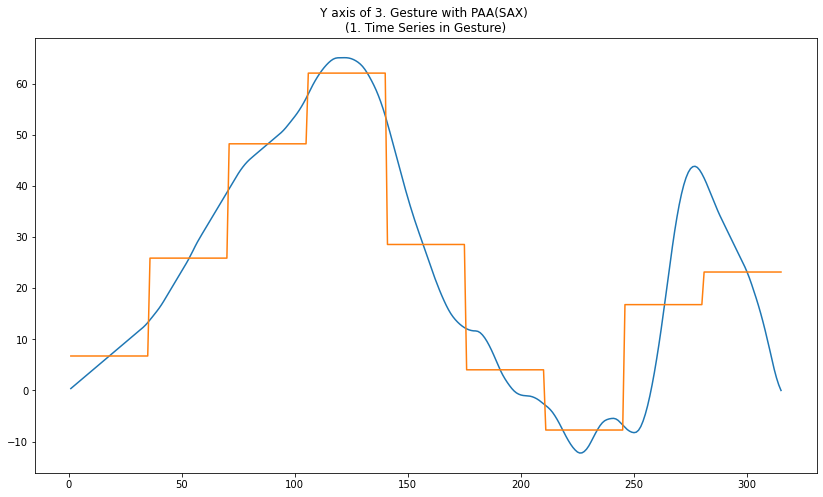

In [60]:
Y_3_0=visualization(y_3, value_data_3, 3, "Y", 0) #Returned Dataset Represent the required dataframe, Y axis, 3. Gesture, 0.item

### Z axis

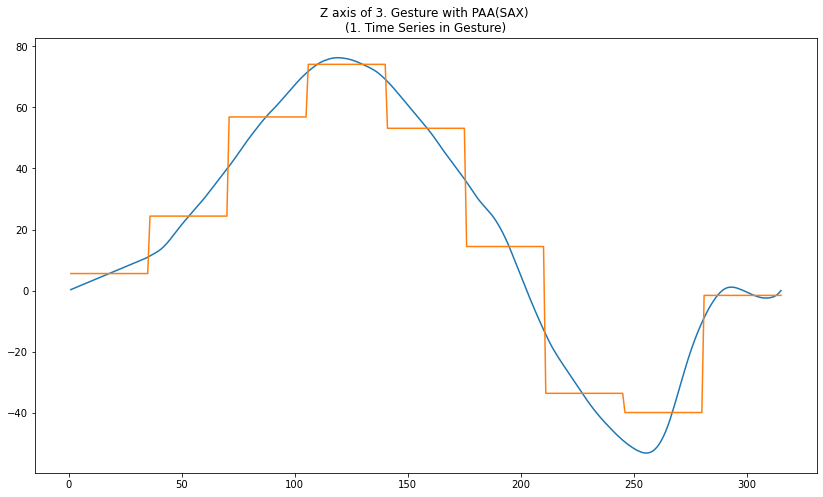

In [61]:
Z_3_0=visualization(z_3, value_data_3, 3, "Z", 0) #Returned Dataset Represent the required dataframe, Z axis, 3. Gesture, 0.item

## Gesture 4 SAX with PAA

In [62]:
x_string_4, x_values_4=string_with_paa(x_4)
y_string_4, y_values_4=string_with_paa(y_4)
z_string_4, z_values_4=string_with_paa(z_4)

In [63]:
string_data_4 = [pd.DataFrame({"X":x_string_4[i], "Y":y_string_4[i], "Z":z_string_4[i]}) for i in range(x_4.shape[0])]

In [64]:
value_data_4 = [pd.DataFrame({"X":x_values_4[i], "Y":y_values_4[i], "Z":z_values_4[i]}) for i in range(x_4.shape[0])]

### Hard Voting 

In [65]:
for i in range(x_4.shape[0]):
    string_data_4[i]["hard_voting"]=majority_voting(string_data_4[i])

### X axis

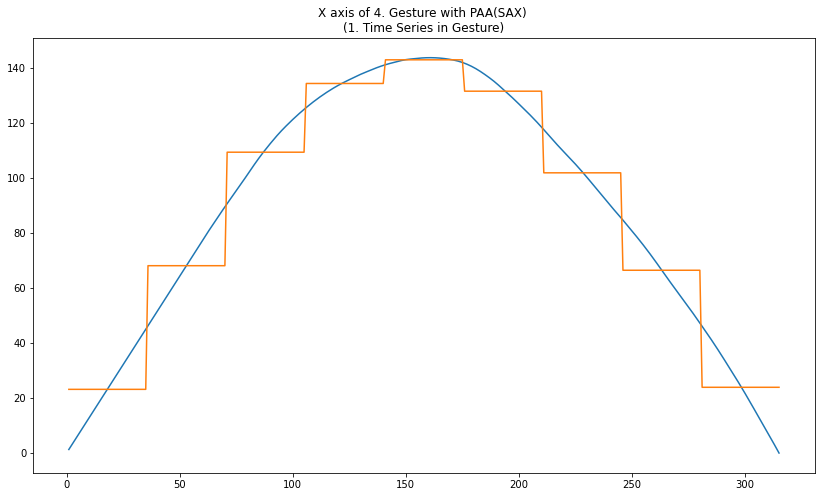

In [66]:
X_4_0=visualization(x_4, value_data_4, 4, "X", 0) #Returned Dataset Represent the required dataframe, X axis, 4. Gesture, 0.item

### Y axis

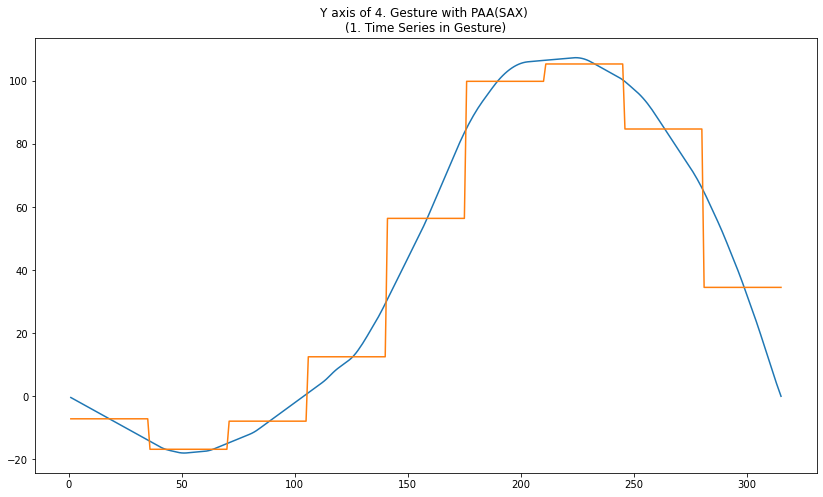

In [67]:
Y_4_0=visualization(y_4, value_data_4, 4, "Y", 0) #Returned Dataset Represent the required dataframe, Y axis, 4. Gesture, 0.item

### Z axis

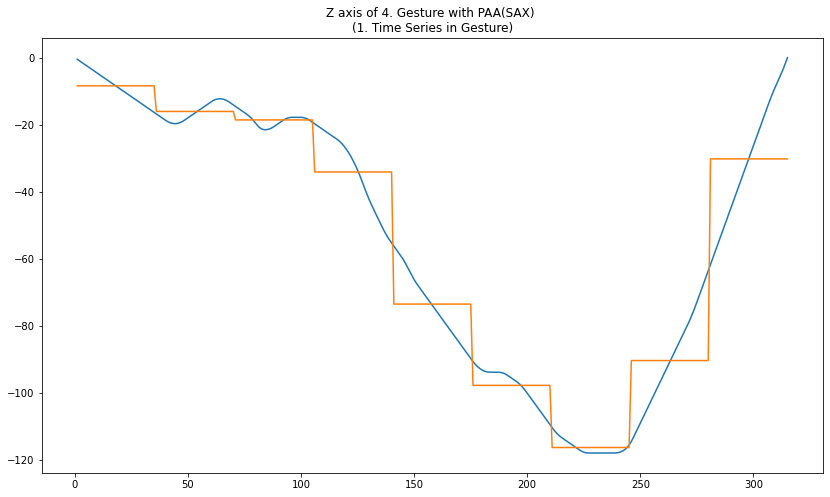

In [68]:
Z_4_0=visualization(z_4, value_data_4, 4, "Z", 0) #Returned Dataset Represent the required dataframe, Z axis, 4. Gesture, 0.item

## Gesture 5 SAX with PAA

In [69]:
x_string_5, x_values_5=string_with_paa(x_5)
y_string_5, y_values_5=string_with_paa(y_5)
z_string_5, z_values_5=string_with_paa(z_5)

In [70]:
string_data_5 = [pd.DataFrame({"X":x_string_5[i], "Y":y_string_5[i], "Z":z_string_5[i]}) for i in range(x_5.shape[0])]

In [71]:
value_data_5 = [pd.DataFrame({"X":x_values_5[i], "Y":y_values_5[i], "Z":z_values_5[i]}) for i in range(x_5.shape[0])]

### Hard Voting 

In [72]:
for i in range(x_5.shape[0]):
    string_data_5[i]["hard_voting"]=majority_voting(string_data_5[i])

### X axis

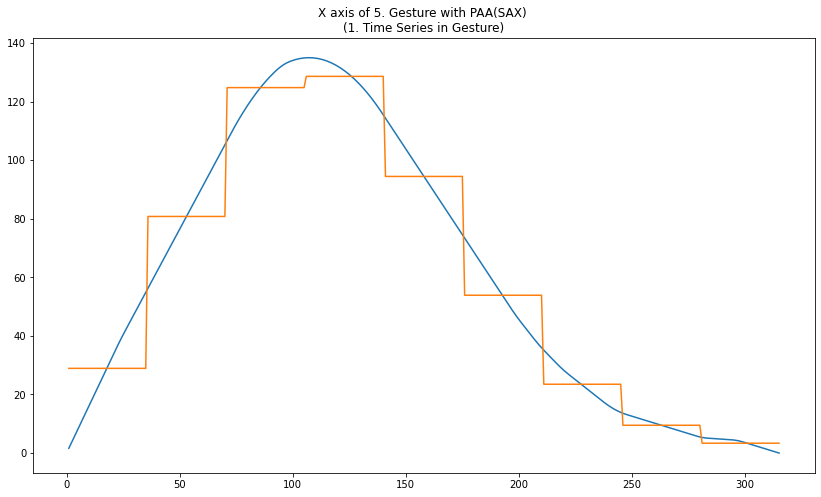

In [73]:
X_5_0=visualization(x_5, value_data_5, 5, "X", 0) #Returned Dataset Represent the required dataframe, X axis, 5. Gesture, 0.item

### Y axis

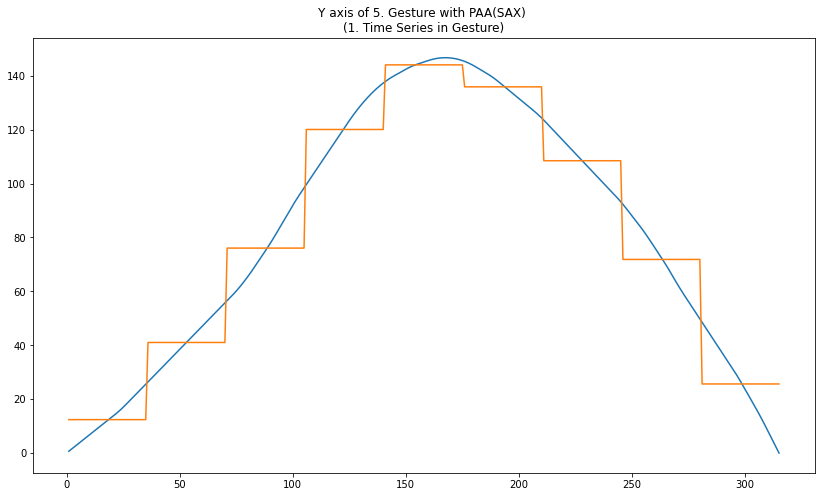

In [74]:
Y_5_0=visualization(y_5, value_data_5, 5, "Y", 0) #Returned Dataset Represent the required dataframe, Y axis, 5. Gesture, 0.item

### Z axis

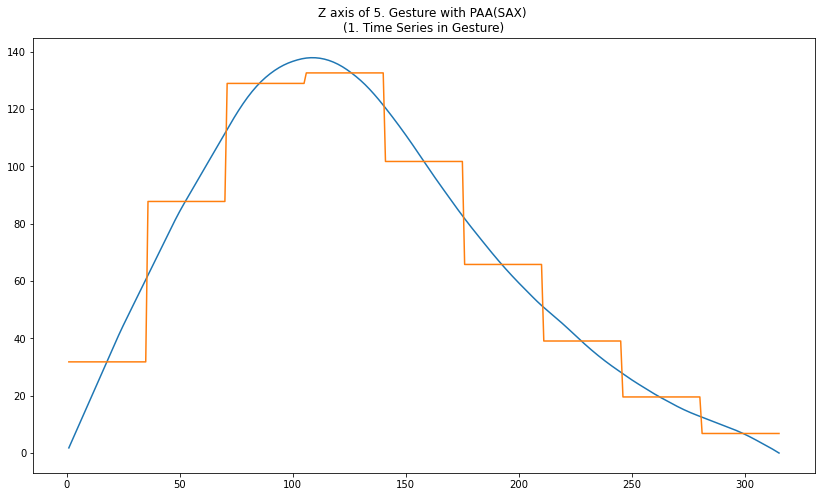

In [75]:
Z_5_0=visualization(z_5, value_data_5, 5, "Z", 0) #Returned Dataset Represent the required dataframe, Z axis, 5. Gesture, 0.item

## Gesture 6 SAX with PAA

In [76]:
x_string_6, x_values_6=string_with_paa(x_6)
y_string_6, y_values_6=string_with_paa(y_6)
z_string_6, z_values_6=string_with_paa(z_6)

In [77]:
string_data_6 = [pd.DataFrame({"X":x_string_6[i], "Y":y_string_6[i], "Z":z_string_6[i]}) for i in range(x_6.shape[0])]

In [78]:
value_data_6 = [pd.DataFrame({"X":x_values_6[i], "Y":y_values_6[i], "Z":z_values_6[i]}) for i in range(x_6.shape[0])]

### Hard Voting 

In [79]:
for i in range(x_6.shape[0]):
    string_data_6[i]["hard_voting"]=majority_voting(string_data_6[i])

### X axis

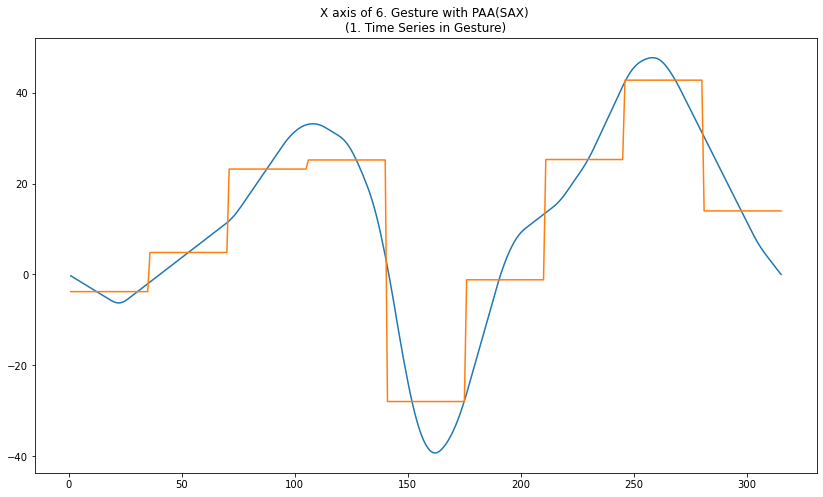

In [80]:
X_6_0=visualization(x_6, value_data_6, 6, "X", 0) #Returned Dataset Represent the required dataframe, X axis, 6. Gesture, 0.item

### Y axis

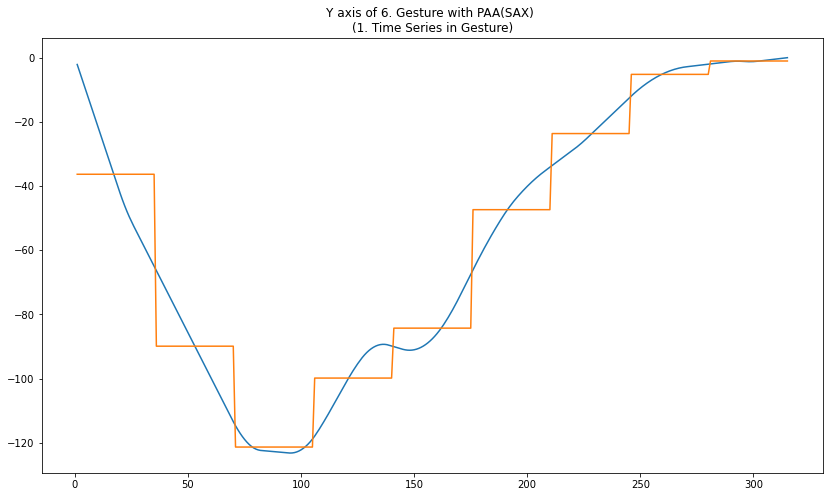

In [81]:
Y_6_0=visualization(y_6, value_data_6, 6, "Y", 0) #Returned Dataset Represent the required dataframe, Y axis, 6. Gesture, 0.item

### Z axis

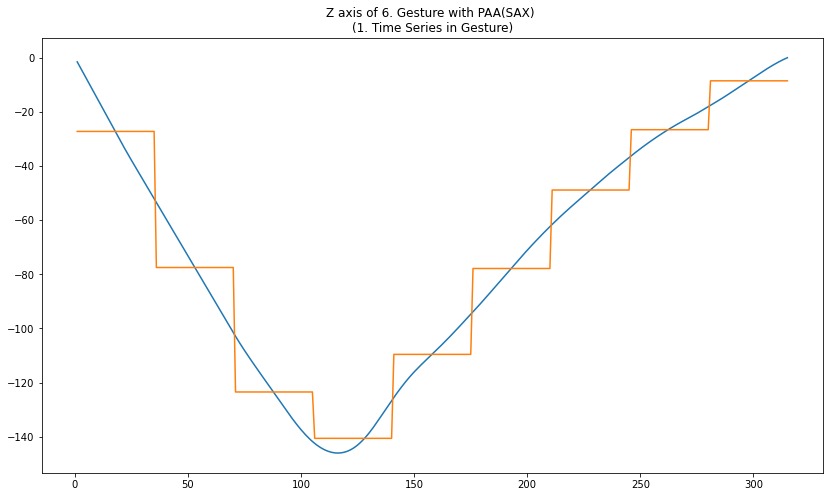

In [82]:
Z_6_0=visualization(z_6, value_data_6, 6, "Z", 0) #Returned Dataset Represent the required dataframe, Z axis, 6. Gesture, 0.item

## Gesture 7 SAX with PAA

In [83]:
x_string_7, x_values_7=string_with_paa(x_7)
y_string_7, y_values_7=string_with_paa(y_7)
z_string_7, z_values_7=string_with_paa(z_7)

In [84]:
string_data_7 = [pd.DataFrame({"X":x_string_7[i], "Y":y_string_7[i], "Z":z_string_7[i]}) for i in range(x_7.shape[0])]

In [85]:
value_data_7 = [pd.DataFrame({"X":x_values_7[i], "Y":y_values_7[i], "Z":z_values_7[i]}) for i in range(x_7.shape[0])]

### Hard Voting 

In [86]:
for i in range(x_7.shape[0]):
    string_data_7[i]["hard_voting"]=majority_voting(string_data_7[i])

### X axis

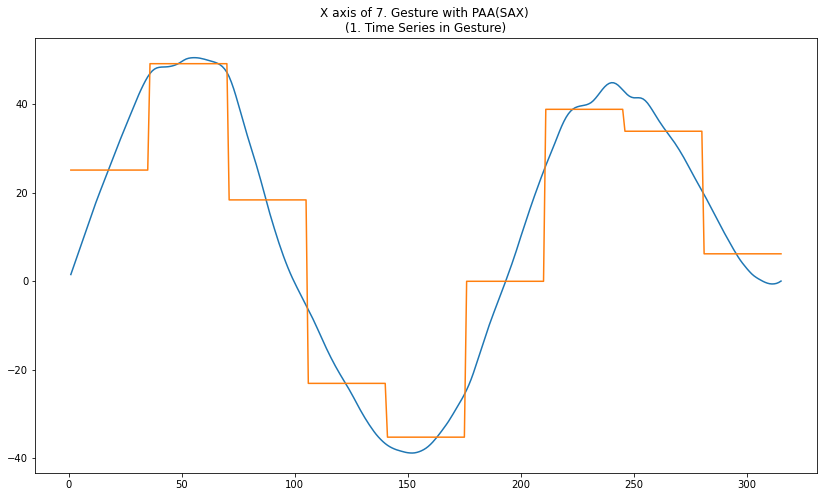

In [87]:
X_7_0=visualization(x_7, value_data_7, 7, "X", 0) #Returned Dataset Represent the required dataframe, X axis, 7. Gesture, 0.item

### Y axis

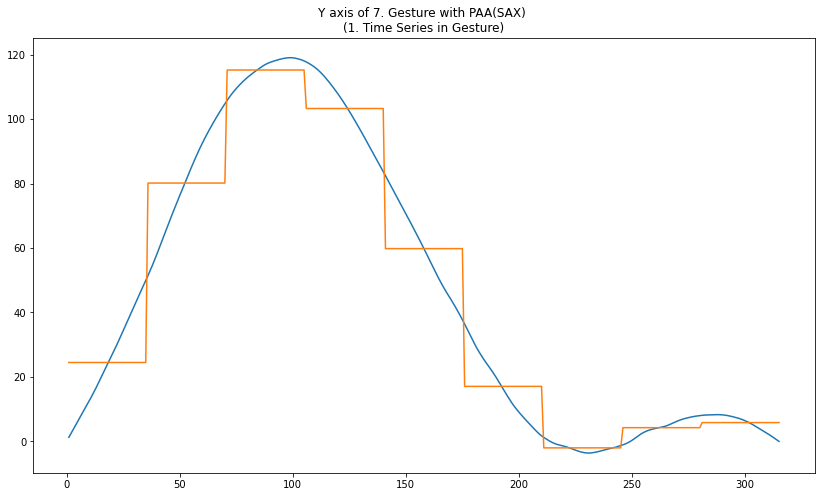

In [88]:
Y_7_0=visualization(y_7, value_data_7, 7, "Y", 0) #Returned Dataset Represent the required dataframe, Y axis, 7. Gesture, 0.item

### Z axis

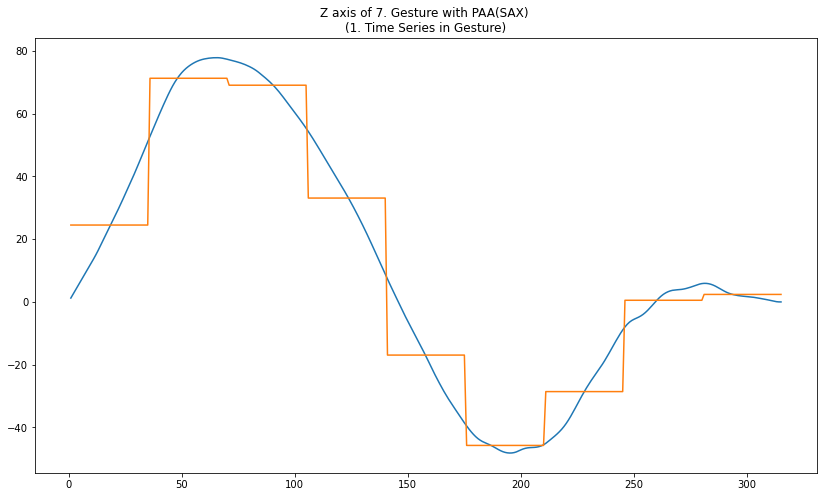

In [89]:
Z_7_0=visualization(z_7, value_data_7, 7, "Z", 0) #Returned Dataset Represent the required dataframe, Z axis, 7. Gesture, 0.item

## Gesture 8 SAX with PAA

In [90]:
x_string_8, x_values_8=string_with_paa(x_8)
y_string_8, y_values_8=string_with_paa(y_8)
z_string_8, z_values_8=string_with_paa(z_8)

In [91]:
string_data_8 = [pd.DataFrame({"X":x_string_8[i], "Y":y_string_8[i], "Z":z_string_8[i]}) for i in range(x_8.shape[0])]

In [92]:
value_data_8 = [pd.DataFrame({"X":x_values_8[i], "Y":y_values_8[i], "Z":z_values_8[i]}) for i in range(x_8.shape[0])]

### Hard Voting 

In [93]:
for i in range(x_8.shape[0]):
    string_data_8[i]["hard_voting"]=majority_voting(string_data_8[i])

### X axis

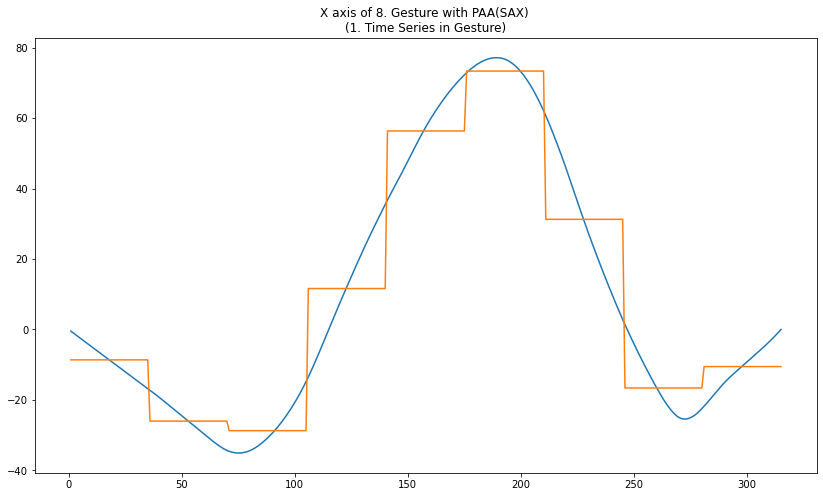

In [94]:
X_8_0=visualization(x_8, value_data_8, 8, "X", 0) #Returned Dataset Represent the required dataframe, X axis, 8. Gesture, 0.item

### Y axis

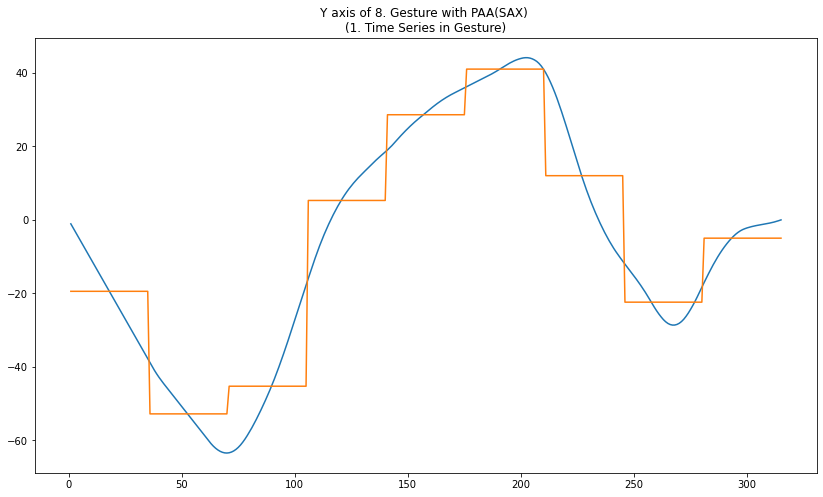

In [95]:
Y_8_0=visualization(y_8, value_data_8, 8, "Y", 0) #Returned Dataset Represent the required dataframe, Y axis, 8. Gesture, 0.item

### Z axis

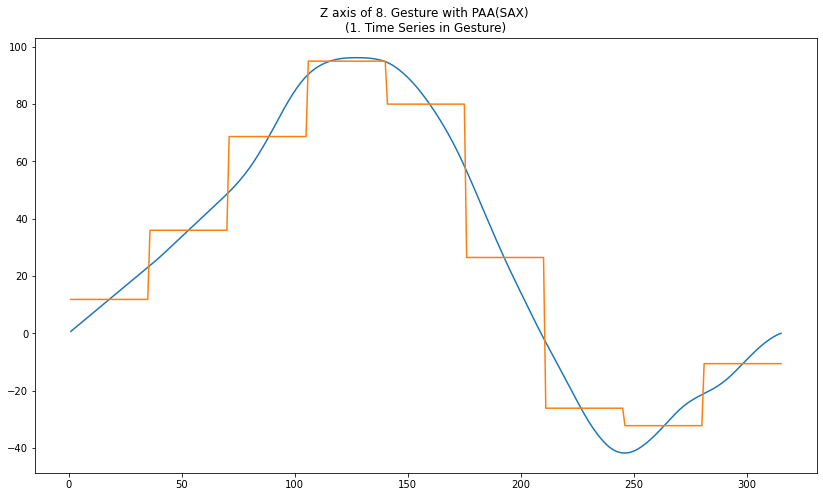

In [96]:
Z_8_0=visualization(z_8, value_data_8, 8, "Z", 0) #Returned Dataset Represent the required dataframe, Z axis, 8. Gesture, 0.item

# General Comment for Axis Representation

If there is an huge increase or decrease it is hard to represent this period by a single line. This problem can be handled by increasing the number of slot bu it can cause an overfitting problem. In addition, it is hard to understand the gesture by seperately looking the axis information. Final Gesture recognition will be handled at the end of the notebook by using moderate hard majority voting technique. In addition, numerical values didn't calculated because **only visual inspection was demanded in homework description.** 

In [97]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [98]:
from sklearn.decomposition import PCA

In [99]:
def decision_tree(model, id_value, dataset):
    time=dataset[id_value][["time"]]
    values=dataset[id_value][["values"]]
    model.fit(time, values)
    
    predictions=model.predict(time)
    
    return predictions

In [100]:
def visualization_regressor(origin, created, gesture_no, ax_code, id_value):
    """ 
    x value is represented by 0
    y value is represented by 1
    z value is represented by 2
    id_value represent which item is selected(in sequence) in filtered dataset by gesture class information(V1 in intial data)
    """
    key_values = {"X": 0, "Y": 1, "Z":2}
    
    ax_sequence=key_values.get(ax_code)
    
    location=pd.DataFrame(origin.loc[:, "values"]).reset_index(drop=True) #
    location.set_axis(["original_values"], axis=1, inplace=True)
    location.index+=1

    obtanied_locations=pd.DataFrame(created)
    obtanied_locations.set_axis(["Regressor_value"], axis=1, inplace=True)
    obtanied_locations.index+=1
    mergedDf = pd.merge(location, obtanied_locations, how="left", left_index=True, right_index=True)

    plt.figure(figsize=(14, 8)) 
    plt.plot(mergedDf["original_values"], label="True Values")
    plt.plot(mergedDf["Regressor_value"], label="Regressor Value")
    plt.title(f"{ax_code} axis of {gesture_no}. Gesture with Regressor \n({id_value+1}. Time Series in Gesture)")
    
    return(mergedDf)

# Gesture 1 with Regression Tree

In [101]:
x_1_r=[pd.DataFrame({"time":range(1, len(x_1.T.iloc[:, i])+1), "values":x_1.T.iloc[:, i]}) for i in range(x_1.shape[0])]
y_1_r=[pd.DataFrame({"time":range(1, len(y_1.T.iloc[:, i])+1), "values":y_1.T.iloc[:, i]}) for i in range(y_1.shape[0])]
z_1_r=[pd.DataFrame({"time":range(1, len(z_1.T.iloc[:, i])+1), "values":z_1.T.iloc[:, i]}) for i in range(z_1.shape[0])]

## Individual Decision Models

In [102]:
tree_reg_x_1 = [DecisionTreeRegressor(max_depth=3) for i in range(x_1.shape[0])]
tree_reg_y_1 = [DecisionTreeRegressor(max_depth=3) for i in range(x_1.shape[0])]
tree_reg_z_1 = [DecisionTreeRegressor(max_depth=3) for i in range(x_1.shape[0])]

In [103]:
x_1_0_reg_pred=decision_tree(tree_reg_x_1[0], 0, x_1_r)
y_1_0_reg_pred=decision_tree(tree_reg_y_1[0], 0, y_1_r)
z_1_0_reg_pred=decision_tree(tree_reg_z_1[0], 0, z_1_r)

## PCA for Gesture 1

In [104]:
pca_1 = [pd.DataFrame({"time":x_1_r[i].iloc[:, 0].values,
                         "values_x":x_1_r[i].iloc[:, 1].values,
                         "values_y":y_1_r[i].iloc[:, 1].values,
                         "values_z":z_1_r[i].iloc[:, 1].values,})  for i in range(x_1.shape[0])]

In [105]:
for i in range(len(pca_1)):
    pca=PCA(n_components = 1)
    pca_1[i]["PCA"]=pca.fit_transform(pca_1[i].iloc[:, 1:4])

In [106]:
pca.explained_variance_ratio_

array([0.6013385])

In [107]:
pca.components_.T[:, 0]

array([ 0.82205994, -0.56627159,  0.05961491])

## Display of Axis

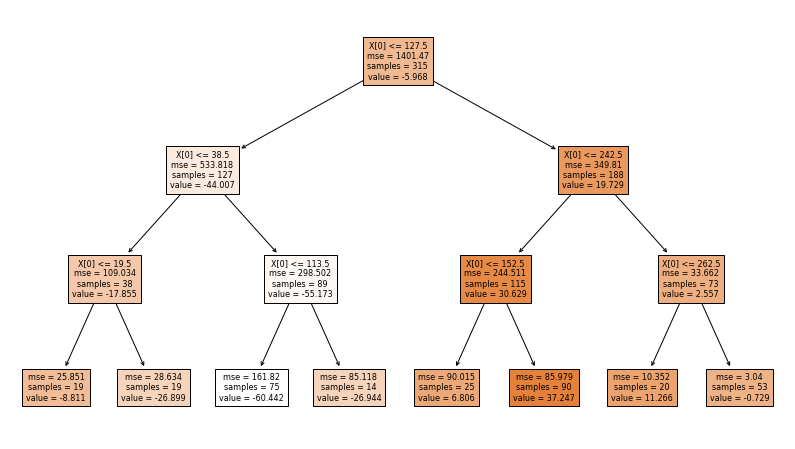

In [108]:
plt.figure(figsize=(14, 8)) 
plt.show(tree.plot_tree(tree_reg_x_1[0],filled=True, fontsize=8))

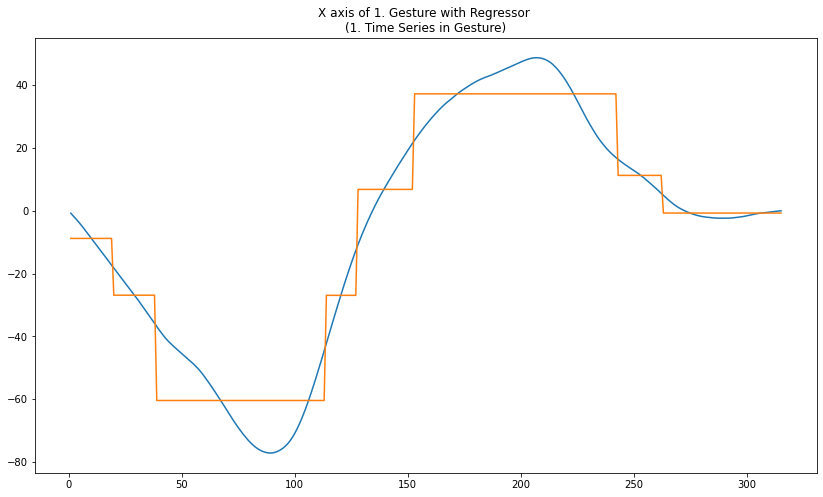

In [109]:
x_1_0_r=visualization_regressor(x_1_r[0], x_1_0_reg_pred, 1, "X", 0)

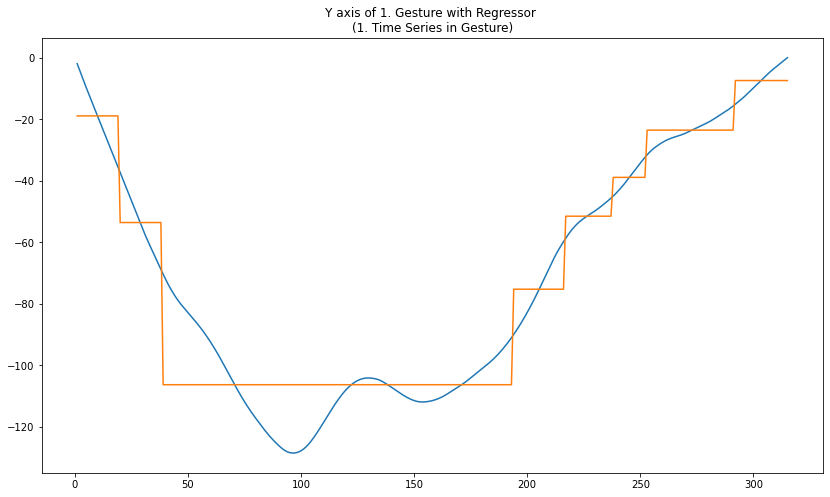

In [110]:
y_1_0_r=visualization_regressor(y_1_r[0], y_1_0_reg_pred, 1, "Y", 0)

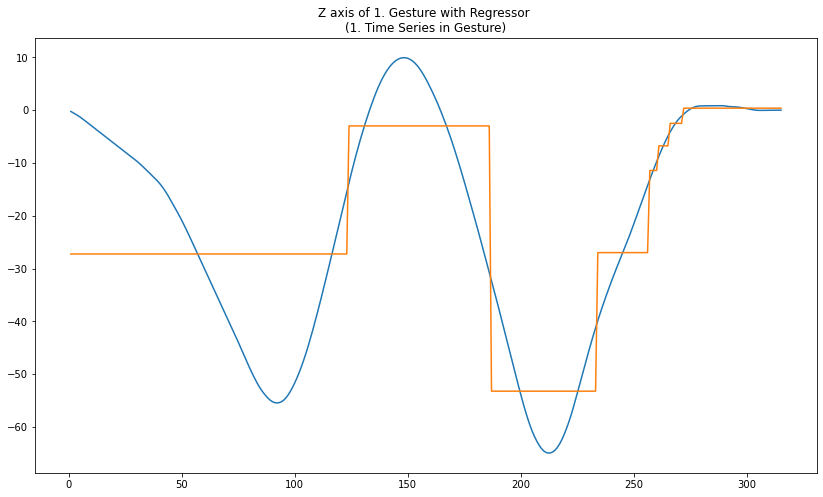

In [111]:
z_1_0_r=visualization_regressor(z_1_r[0], z_1_0_reg_pred, 1, "Z", 0)

# Gesture 2 with Regression Tree

In [112]:
x_2_r=[pd.DataFrame({"time":range(1, len(x_2.T.iloc[:, i])+1), "values":x_2.T.iloc[:, i]}) for i in range(x_2.shape[0])]
y_2_r=[pd.DataFrame({"time":range(1, len(y_2.T.iloc[:, i])+1), "values":y_2.T.iloc[:, i]}) for i in range(y_2.shape[0])]
z_2_r=[pd.DataFrame({"time":range(1, len(z_2.T.iloc[:, i])+1), "values":z_2.T.iloc[:, i]}) for i in range(z_2.shape[0])]

## Individual Decision Models

In [113]:
tree_reg_x_2 = [DecisionTreeRegressor(max_depth=3) for i in range(x_2.shape[0])]
tree_reg_y_2 = [DecisionTreeRegressor(max_depth=3) for i in range(x_2.shape[0])]
tree_reg_z_2 = [DecisionTreeRegressor(max_depth=3) for i in range(x_2.shape[0])]

In [114]:
x_2_0_reg_pred=decision_tree(tree_reg_x_2[0], 0, x_2_r)
y_2_0_reg_pred=decision_tree(tree_reg_y_2[0], 0, y_2_r)
z_2_0_reg_pred=decision_tree(tree_reg_z_2[0], 0, z_2_r)

## PCA for Gesture 2

In [115]:
pca_2 = [pd.DataFrame({"time":x_2_r[i].iloc[:, 0].values,
                         "values_x":x_2_r[i].iloc[:, 1].values,
                         "values_y":y_2_r[i].iloc[:, 1].values,
                         "values_z":z_2_r[i].iloc[:, 1].values,})  for i in range(x_2.shape[0])]

In [116]:
for i in range(len(pca_2)):
    pca=PCA(n_components = 1)
    pca_2[i]["PCA"]=pca.fit_transform(pca_2[i].iloc[:, 1:4])

In [117]:
pca.explained_variance_ratio_

array([0.82045414])

In [118]:
pca.components_.T[:, 0]

array([0.28086265, 0.81655115, 0.50434153])

## Display of Axis

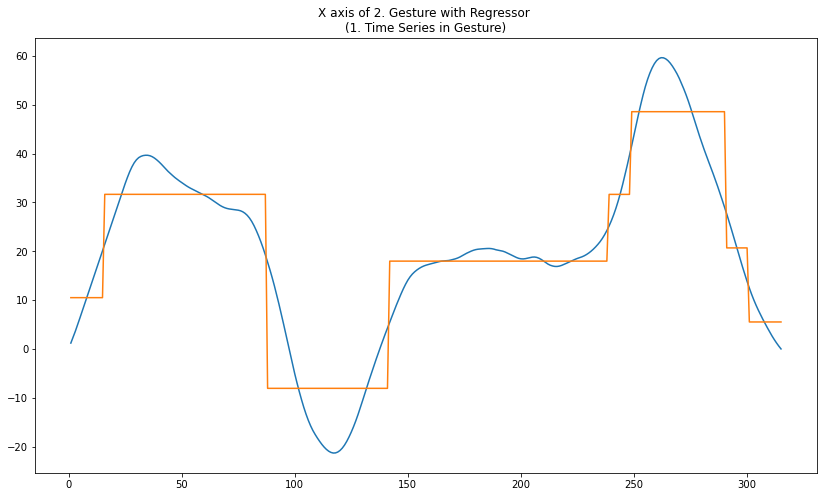

In [119]:
x_2_0_r=visualization_regressor(x_2_r[0], x_2_0_reg_pred, 2, "X", 0)

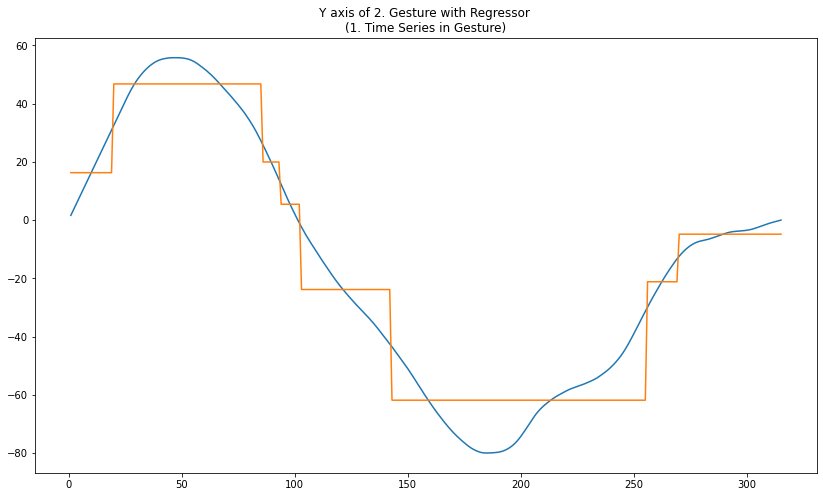

In [120]:
y_2_0_r=visualization_regressor(y_2_r[0], y_2_0_reg_pred, 2, "Y", 0)

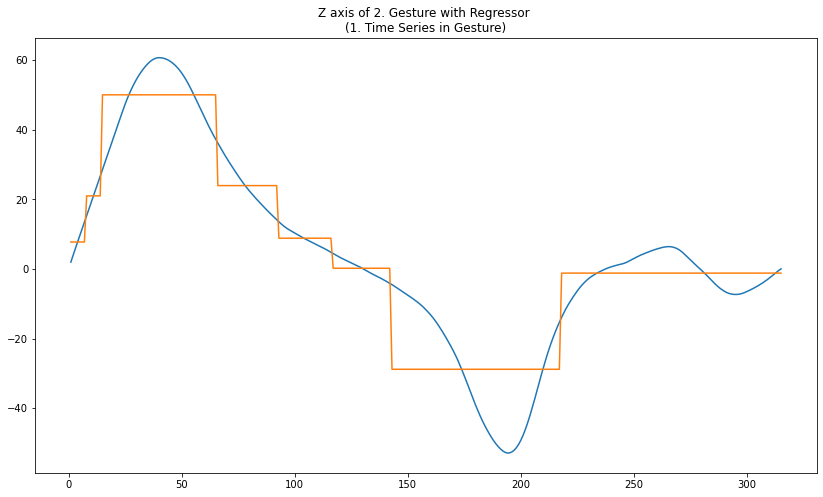

In [121]:
z_2_0_r=visualization_regressor(z_2_r[0], z_2_0_reg_pred, 2, "Z", 0)

# Gesture 3 with Regression Tree

In [122]:
x_3_r=[pd.DataFrame({"time":range(1, len(x_3.T.iloc[:, i])+1), "values":x_3.T.iloc[:, i]}) for i in range(x_3.shape[0])]
y_3_r=[pd.DataFrame({"time":range(1, len(y_3.T.iloc[:, i])+1), "values":y_3.T.iloc[:, i]}) for i in range(y_3.shape[0])]
z_3_r=[pd.DataFrame({"time":range(1, len(z_3.T.iloc[:, i])+1), "values":z_3.T.iloc[:, i]}) for i in range(z_3.shape[0])]

## Individual Decision Models

In [123]:
tree_reg_x_3 = [DecisionTreeRegressor(max_depth=3) for i in range(x_3.shape[0])]
tree_reg_y_3 = [DecisionTreeRegressor(max_depth=3) for i in range(x_3.shape[0])]
tree_reg_z_3 = [DecisionTreeRegressor(max_depth=3) for i in range(x_3.shape[0])]

In [124]:
x_3_0_reg_pred=decision_tree(tree_reg_x_3[0], 0, x_3_r)
y_3_0_reg_pred=decision_tree(tree_reg_y_3[0], 0, y_3_r)
z_3_0_reg_pred=decision_tree(tree_reg_z_3[0], 0, z_3_r)

## PCA for Gesture 3

In [125]:
pca_3 = [pd.DataFrame({"time":x_3_r[i].iloc[:, 0].values,
                         "values_x":x_3_r[i].iloc[:, 1].values,
                         "values_y":y_3_r[i].iloc[:, 1].values,
                         "values_z":z_3_r[i].iloc[:, 1].values,})  for i in range(x_3.shape[0])]

In [126]:
for i in range(len(pca_3)):
    pca=PCA(n_components = 1)
    pca_3[i]["PCA"]=pca.fit_transform(pca_3[i].iloc[:, 1:4])

In [127]:
pca.explained_variance_ratio_

array([0.61629961])

In [128]:
pca.components_.T[:, 0]

array([-0.71875134, -0.00611104,  0.69524037])

## Display of Axis

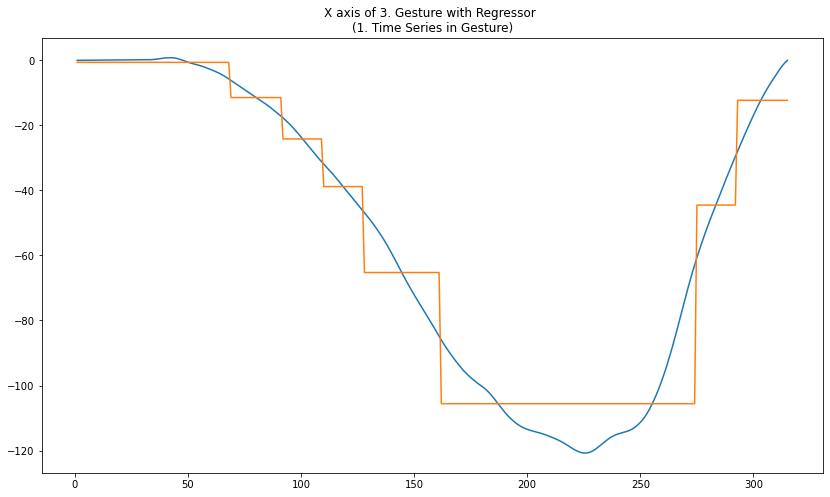

In [129]:
x_3_0_r=visualization_regressor(x_3_r[0], x_3_0_reg_pred, 3, "X", 0)

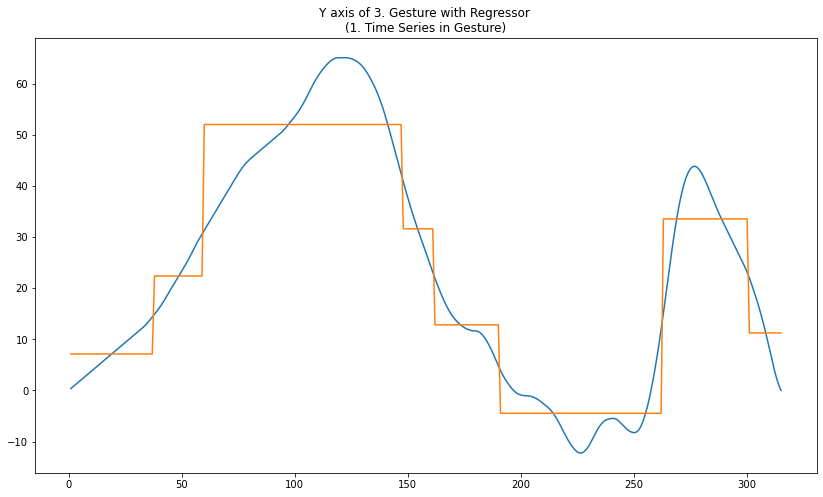

In [130]:
y_3_0_r=visualization_regressor(y_3_r[0], y_3_0_reg_pred, 3, "Y", 0)

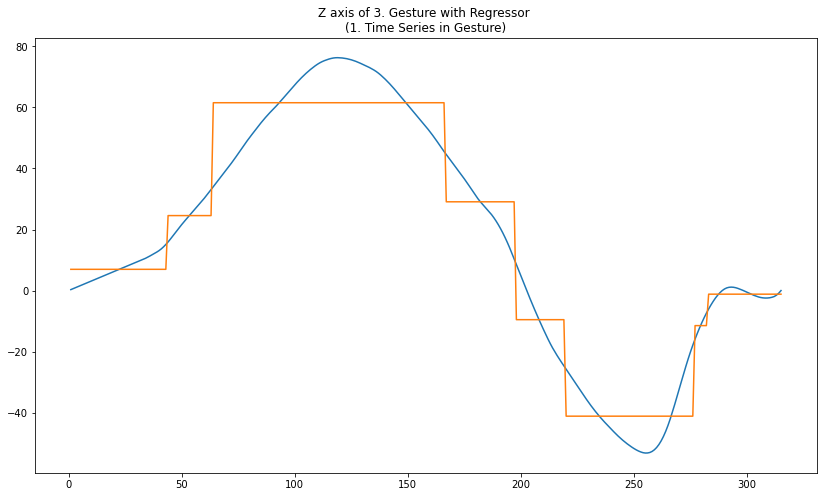

In [131]:
z_3_0_r=visualization_regressor(z_3_r[0], z_3_0_reg_pred, 3, "Z", 0)

# Gesture 4 with Regression Tree

In [132]:
x_4_r=[pd.DataFrame({"time":range(1, len(x_4.T.iloc[:, i])+1), "values":x_4.T.iloc[:, i]}) for i in range(x_4.shape[0])]
y_4_r=[pd.DataFrame({"time":range(1, len(y_4.T.iloc[:, i])+1), "values":y_4.T.iloc[:, i]}) for i in range(y_4.shape[0])]
z_4_r=[pd.DataFrame({"time":range(1, len(z_4.T.iloc[:, i])+1), "values":z_4.T.iloc[:, i]}) for i in range(z_4.shape[0])]

## Individual Decision Models

In [133]:
tree_reg_x_4 = [DecisionTreeRegressor(max_depth=3) for i in range(x_4.shape[0])]
tree_reg_y_4 = [DecisionTreeRegressor(max_depth=3) for i in range(x_4.shape[0])]
tree_reg_z_4 = [DecisionTreeRegressor(max_depth=3) for i in range(x_4.shape[0])]

In [134]:
x_4_0_reg_pred=decision_tree(tree_reg_x_4[0], 0, x_4_r)
y_4_0_reg_pred=decision_tree(tree_reg_y_4[0], 0, y_4_r)
z_4_0_reg_pred=decision_tree(tree_reg_z_4[0], 0, z_4_r)

## PCA for Gesture 4

In [135]:
pca_4 = [pd.DataFrame({"time":x_4_r[i].iloc[:, 0].values,
                         "values_x":x_4_r[i].iloc[:, 1].values,
                         "values_y":y_4_r[i].iloc[:, 1].values,
                         "values_z":z_4_r[i].iloc[:, 1].values,})  for i in range(x_4.shape[0])]

In [136]:
for i in range(len(pca_4)):
    pca=PCA(n_components = 1)
    pca_4[i]["PCA"]=pca.fit_transform(pca_4[i].iloc[:, 1:4])

In [137]:
pca.explained_variance_ratio_

array([0.75848601])

In [138]:
pca.components_.T[:, 0]

array([ 0.52188473,  0.6510052 , -0.55120646])

## Display of Axis

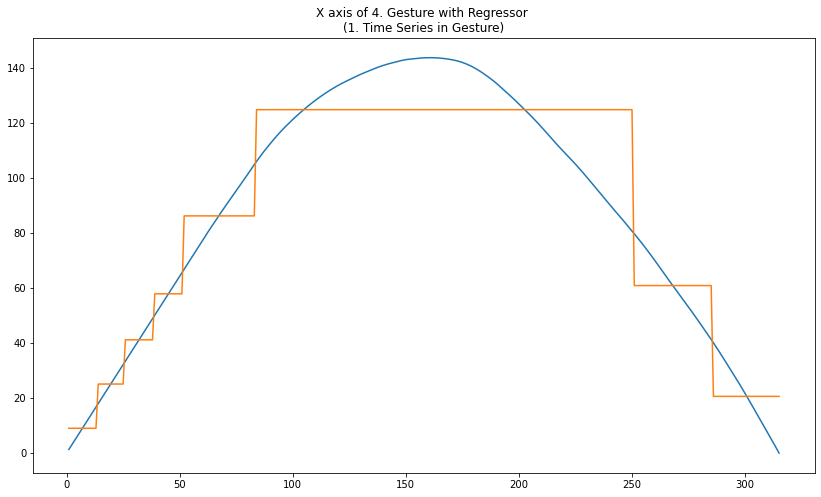

In [139]:
x_4_0_r=visualization_regressor(x_4_r[0], x_4_0_reg_pred, 4, "X", 0)

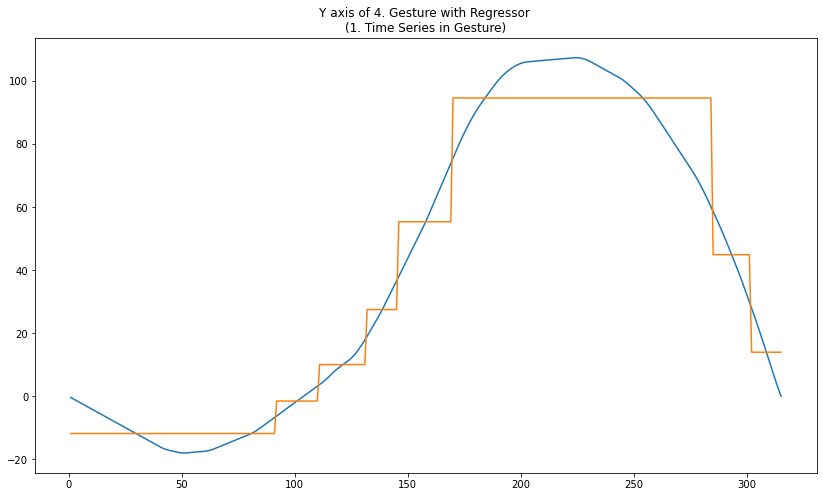

In [140]:
y_4_0_r=visualization_regressor(y_4_r[0], y_4_0_reg_pred, 4, "Y", 0)

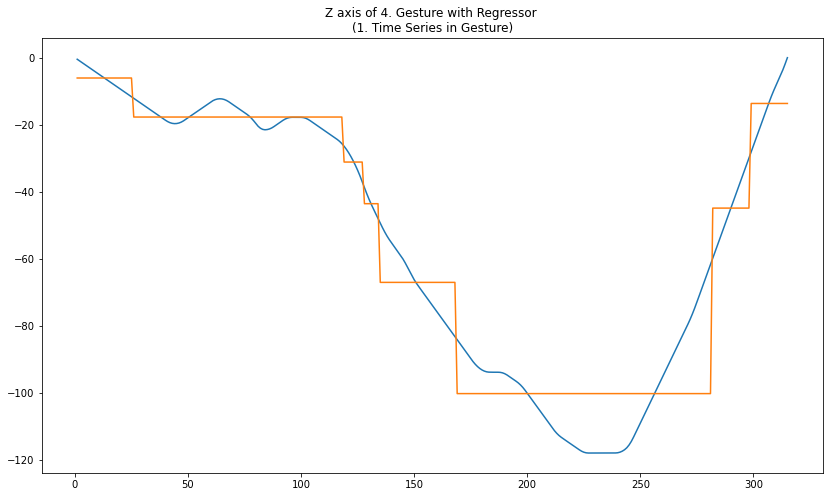

In [141]:
z_4_0_r=visualization_regressor(z_4_r[0], z_4_0_reg_pred, 4, "Z", 0)

# Gesture 5 with Regression Tree

In [142]:
x_5_r=[pd.DataFrame({"time":range(1, len(x_5.T.iloc[:, i])+1), "values":x_5.T.iloc[:, i]}) for i in range(x_5.shape[0])]
y_5_r=[pd.DataFrame({"time":range(1, len(y_5.T.iloc[:, i])+1), "values":y_5.T.iloc[:, i]}) for i in range(y_5.shape[0])]
z_5_r=[pd.DataFrame({"time":range(1, len(z_5.T.iloc[:, i])+1), "values":z_5.T.iloc[:, i]}) for i in range(z_5.shape[0])]

## Individual Decision Models

In [143]:
tree_reg_x_5 = [DecisionTreeRegressor(max_depth=3) for i in range(x_5.shape[0])]
tree_reg_y_5 = [DecisionTreeRegressor(max_depth=3) for i in range(x_5.shape[0])]
tree_reg_z_5 = [DecisionTreeRegressor(max_depth=3) for i in range(x_5.shape[0])]

In [144]:
x_5_0_reg_pred=decision_tree(tree_reg_x_5[0], 0, x_5_r)
y_5_0_reg_pred=decision_tree(tree_reg_y_5[0], 0, y_5_r)
z_5_0_reg_pred=decision_tree(tree_reg_z_5[0], 0, z_5_r)

## PCA for Gesture 5

In [145]:
pca_5 = [pd.DataFrame({"time":x_5_r[i].iloc[:, 0].values,
                         "values_x":x_5_r[i].iloc[:, 1].values,
                         "values_y":y_5_r[i].iloc[:, 1].values,
                         "values_z":z_5_r[i].iloc[:, 1].values,})  for i in range(x_5.shape[0])]

In [146]:
for i in range(len(pca_5)):
    pca=PCA(n_components = 1)
    pca_5[i]["PCA"]=pca.fit_transform(pca_5[i].iloc[:, 1:4])

In [147]:
pca.explained_variance_ratio_

array([0.8633823])

In [148]:
pca.components_.T[:, 0]

array([0.31703741, 0.66748272, 0.67376116])

## Display of Axis

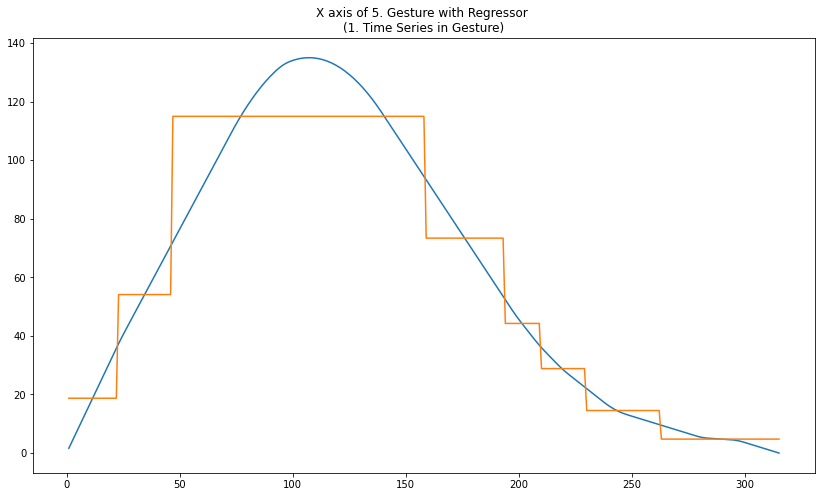

In [149]:
x_5_0_r=visualization_regressor(x_5_r[0], x_5_0_reg_pred, 5, "X", 0)

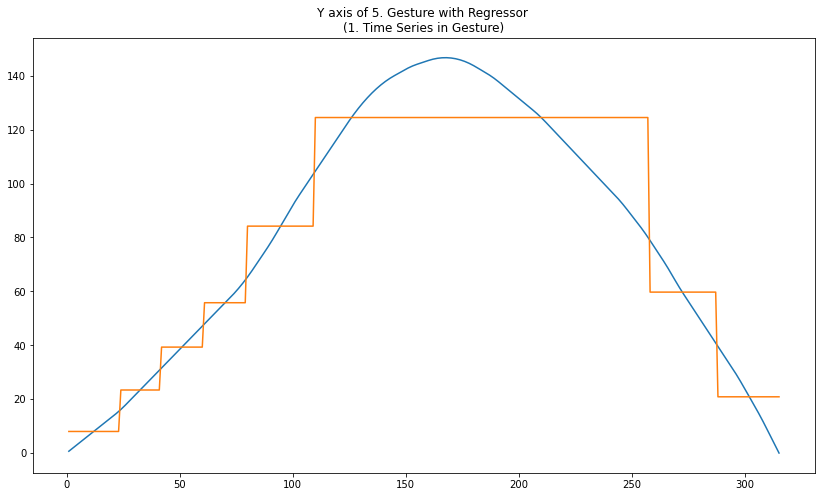

In [150]:
y_5_0_r=visualization_regressor(y_5_r[0], y_5_0_reg_pred, 5, "Y", 0)

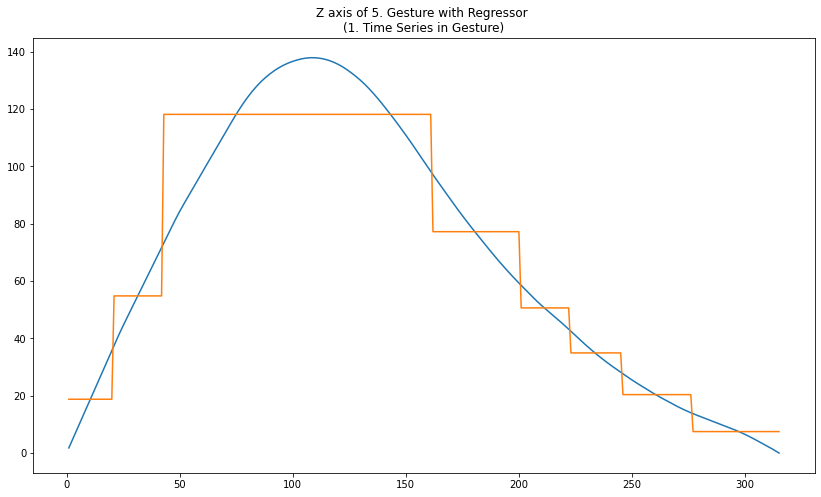

In [151]:
z_5_0_r=visualization_regressor(z_5_r[0], z_5_0_reg_pred, 5, "Z", 0)

# Gesture 6 with Regression Tree

In [152]:
x_6_r=[pd.DataFrame({"time":range(1, len(x_6.T.iloc[:, i])+1), "values":x_6.T.iloc[:, i]}) for i in range(x_6.shape[0])]
y_6_r=[pd.DataFrame({"time":range(1, len(y_6.T.iloc[:, i])+1), "values":y_6.T.iloc[:, i]}) for i in range(y_6.shape[0])]
z_6_r=[pd.DataFrame({"time":range(1, len(z_6.T.iloc[:, i])+1), "values":z_6.T.iloc[:, i]}) for i in range(z_6.shape[0])]

## Individual Decision Models

In [153]:
tree_reg_x_6 = [DecisionTreeRegressor(max_depth=3) for i in range(x_6.shape[0])]
tree_reg_y_6 = [DecisionTreeRegressor(max_depth=3) for i in range(x_6.shape[0])]
tree_reg_z_6 = [DecisionTreeRegressor(max_depth=3) for i in range(x_6.shape[0])]

In [154]:
x_6_0_reg_pred=decision_tree(tree_reg_x_6[0], 0, x_6_r)
y_6_0_reg_pred=decision_tree(tree_reg_y_6[0], 0, y_6_r)
z_6_0_reg_pred=decision_tree(tree_reg_z_6[0], 0, z_6_r)

## PCA for Gesture 6

In [155]:
pca_6 = [pd.DataFrame({"time":x_6_r[i].iloc[:, 0].values,
                         "values_x":x_6_r[i].iloc[:, 1].values,
                         "values_y":y_6_r[i].iloc[:, 1].values,
                         "values_z":z_6_r[i].iloc[:, 1].values,})  for i in range(x_6.shape[0])]

In [156]:
for i in range(len(pca_6)):
    pca=PCA(n_components = 1)
    pca_6[i]["PCA"]=pca.fit_transform(pca_6[i].iloc[:, 1:4])

In [157]:
pca.explained_variance_ratio_

array([0.85800118])

In [158]:
pca.components_.T[:, 0]

array([-0.30939141,  0.69769414,  0.64614228])

## Display of Axis

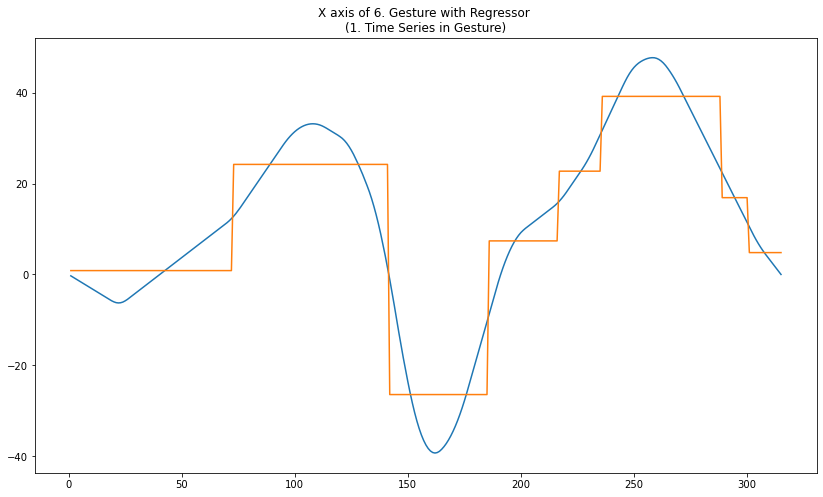

In [159]:
x_6_0_r=visualization_regressor(x_6_r[0], x_6_0_reg_pred, 6, "X", 0)

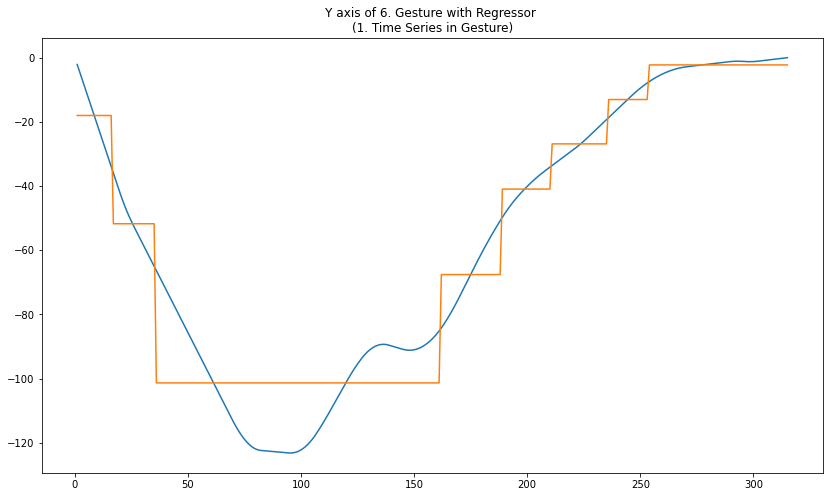

In [160]:
y_6_0_r=visualization_regressor(y_6_r[0], y_6_0_reg_pred, 6, "Y", 0)

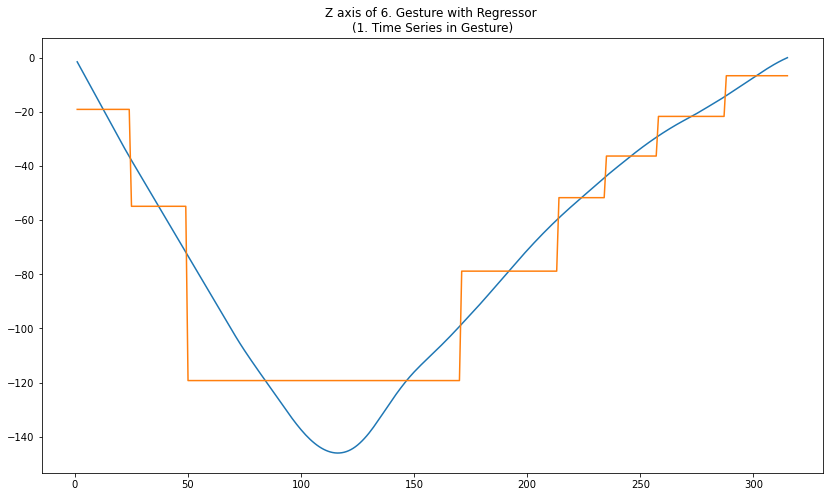

In [161]:
z_6_0_r=visualization_regressor(z_6_r[0], z_6_0_reg_pred, 6, "Z", 0)

# Gesture 7 with Regression Tree

In [162]:
x_7_r=[pd.DataFrame({"time":range(1, len(x_7.T.iloc[:, i])+1), "values":x_7.T.iloc[:, i]}) for i in range(x_7.shape[0])]
y_7_r=[pd.DataFrame({"time":range(1, len(y_7.T.iloc[:, i])+1), "values":y_7.T.iloc[:, i]}) for i in range(y_7.shape[0])]
z_7_r=[pd.DataFrame({"time":range(1, len(z_7.T.iloc[:, i])+1), "values":z_7.T.iloc[:, i]}) for i in range(z_7.shape[0])]

## Individual Decision Models

In [163]:
tree_reg_x_7 = [DecisionTreeRegressor(max_depth=3) for i in range(x_7.shape[0])]
tree_reg_y_7 = [DecisionTreeRegressor(max_depth=3) for i in range(x_7.shape[0])]
tree_reg_z_7 = [DecisionTreeRegressor(max_depth=3) for i in range(x_7.shape[0])]

In [164]:
x_7_0_reg_pred=decision_tree(tree_reg_x_7[0], 0, x_7_r)
y_7_0_reg_pred=decision_tree(tree_reg_y_7[0], 0, y_7_r)
z_7_0_reg_pred=decision_tree(tree_reg_z_7[0], 0, z_7_r)

## PCA for Gesture 7

In [165]:
pca_7 = [pd.DataFrame({"time":x_7_r[i].iloc[:, 0].values,
                         "values_x":x_7_r[i].iloc[:, 1].values,
                         "values_y":y_7_r[i].iloc[:, 1].values,
                         "values_z":z_7_r[i].iloc[:, 1].values,})  for i in range(x_7.shape[0])]

In [166]:
for i in range(len(pca_7)):
    pca=PCA(n_components = 1)
    pca_7[i]["PCA"]=pca.fit_transform(pca_7[i].iloc[:, 1:4])

In [167]:
pca.explained_variance_ratio_

array([0.75109207])

In [168]:
pca.components_.T[:, 0]

array([-0.05074984, -0.67917461, -0.73222012])

## Display of Axis

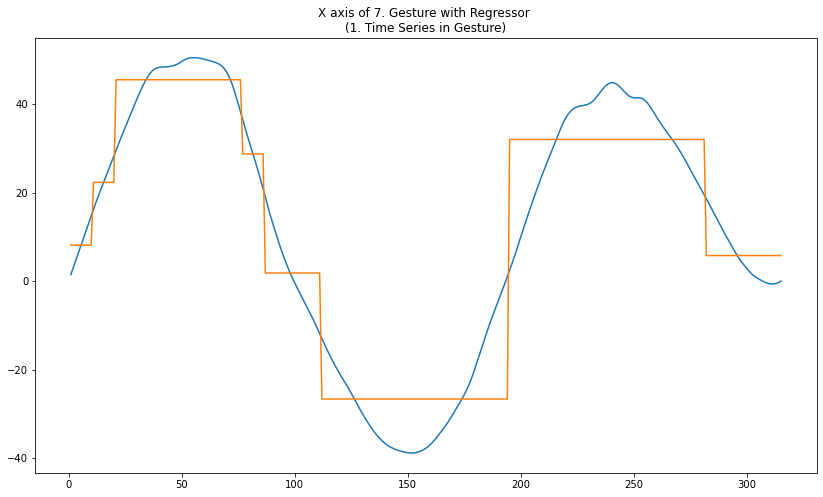

In [169]:
x_7_0_r=visualization_regressor(x_7_r[0], x_7_0_reg_pred, 7, "X", 0)

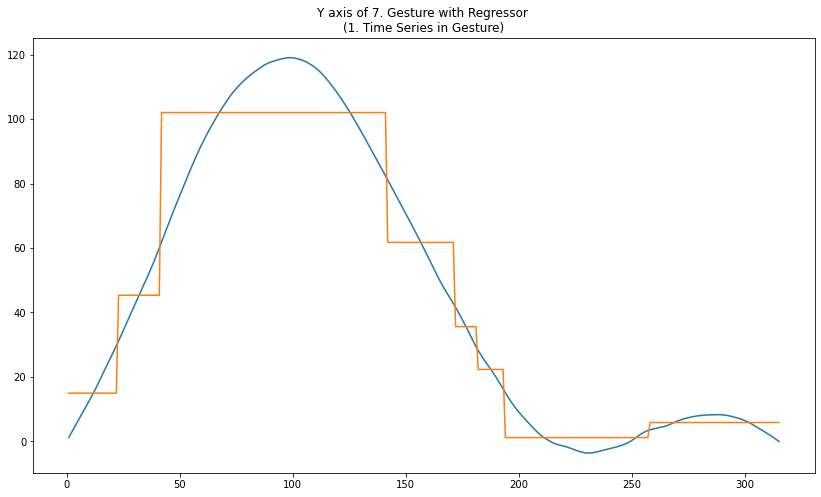

In [170]:
y_7_0_r=visualization_regressor(y_7_r[0], y_7_0_reg_pred, 7, "Y", 0)

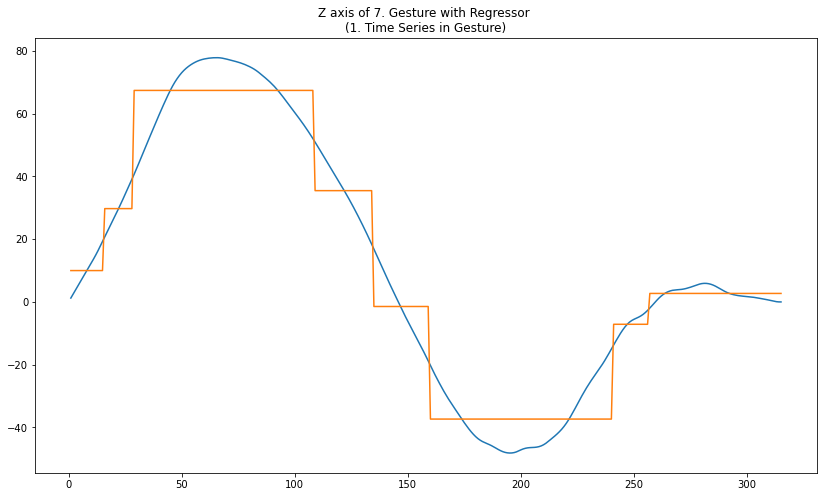

In [171]:
z_7_0_r=visualization_regressor(z_7_r[0], z_7_0_reg_pred, 7, "Z", 0)

# Gesture 8 with Regression Tree

In [172]:
x_8_r=[pd.DataFrame({"time":range(1, len(x_8.T.iloc[:, i])+1), "values":x_8.T.iloc[:, i]}) for i in range(x_8.shape[0])]
y_8_r=[pd.DataFrame({"time":range(1, len(y_8.T.iloc[:, i])+1), "values":y_8.T.iloc[:, i]}) for i in range(y_8.shape[0])]
z_8_r=[pd.DataFrame({"time":range(1, len(z_8.T.iloc[:, i])+1), "values":z_8.T.iloc[:, i]}) for i in range(z_8.shape[0])]

## Individual Decision Models

In [173]:
tree_reg_x_8 = [DecisionTreeRegressor(max_depth=3) for i in range(x_8.shape[0])]
tree_reg_y_8 = [DecisionTreeRegressor(max_depth=3) for i in range(x_8.shape[0])]
tree_reg_z_8 = [DecisionTreeRegressor(max_depth=3) for i in range(x_8.shape[0])]

In [174]:
x_8_0_reg_pred=decision_tree(tree_reg_x_8[0], 0, x_8_r)
y_8_0_reg_pred=decision_tree(tree_reg_y_8[0], 0, y_8_r)
z_8_0_reg_pred=decision_tree(tree_reg_z_8[0], 0, z_8_r)

## PCA for Gesture 8

In [175]:
pca_8 = [pd.DataFrame({"time":x_8_r[i].iloc[:, 0].values,
                         "values_x":x_8_r[i].iloc[:, 1].values,
                         "values_y":y_8_r[i].iloc[:, 1].values,
                         "values_z":z_8_r[i].iloc[:, 1].values,})  for i in range(x_8.shape[0])]

In [176]:
for i in range(len(pca_8)):
    pca=PCA(n_components = 1)
    pca_8[i]["PCA"]=pca.fit_transform(pca_8[i].iloc[:, 1:4])

In [177]:
pca.explained_variance_ratio_

array([0.54634702])

In [178]:
pca.components_.T[:, 0]

array([ 0.87201588,  0.48847628, -0.03129264])

## Display of Axis

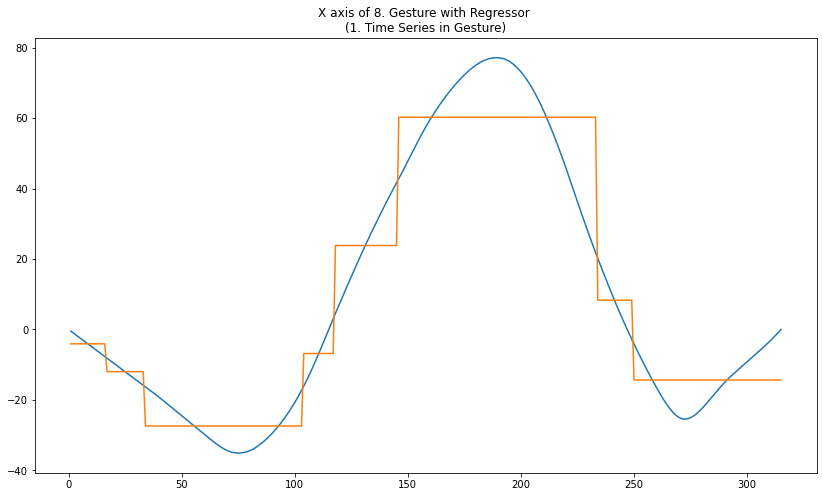

In [179]:
x_8_0_r=visualization_regressor(x_8_r[0], x_8_0_reg_pred, 8, "X", 0)

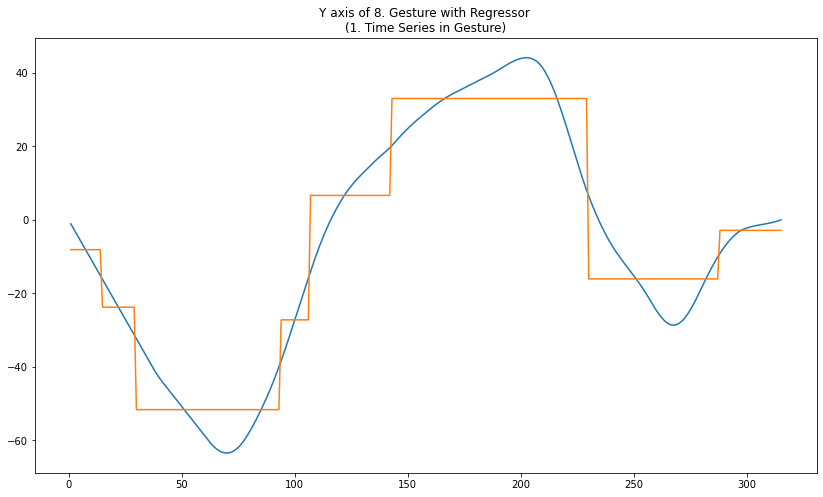

In [180]:
y_8_0_r=visualization_regressor(y_8_r[0], y_8_0_reg_pred, 8, "Y", 0)

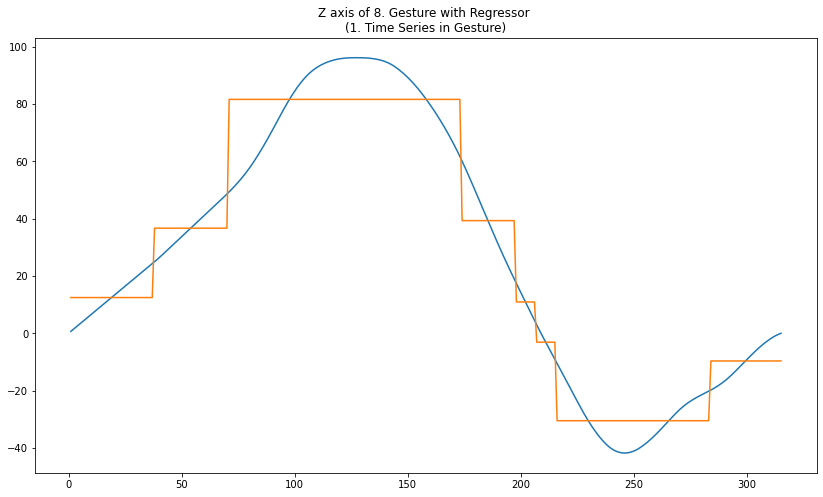

In [181]:
z_8_0_r=visualization_regressor(z_8_r[0], z_8_0_reg_pred, 8, "Z", 0)

Performance of Regressor

# Regression Tree to Find Piecewise Models on PCA

Neden bunu yaptım

In [182]:
def decision_tree_pca(dataset):
    model=DecisionTreeRegressor(max_depth=3)
    time=dataset[["time"]]
    values=dataset[["PCA"]]
    model.fit(time, values)
    
    predictions=model.predict(time)
    
    return predictions

In [183]:
pca_names= [pca_1, pca_2, pca_3, pca_4, pca_5, pca_6, pca_7, pca_8]

In [184]:
for pca_data in pca_names:
    for j in range(2):
        pca_data[j]["predictions"]=decision_tree_pca(pca_data[j])

# Gesture Recognation Perspective

In [194]:
import seaborn as sns

In [255]:
sns.set(rc={'figure.figsize':(16,16)})

## String to Value

In [256]:
def string_to_value(dataset):
    values=[]
    key_values = {"a": (1/7)*0, "b": (1/7)*1, "c":(1/7)*2, "d": (1/7)*3, "e": (1/7)*4, "f":(1/7)*5, "g": (1/7)*6, "h":(1/7)*7}
    for i in range(len(dataset)):
        values.append(key_values.get(dataset["String"][i]))
    
    return(values)

## DataFrame for String

In [257]:
string_datasets=[string_data_1, string_data_2, string_data_3, string_data_4,
                 string_data_5, string_data_6, string_data_7, string_data_8]

In [258]:
string_gesture=[]
string_id=[]
string_vote=[]
time=[]
gesture_no=1
for dt in string_datasets:    
    for j in range(2):
        sequence=1
        for k in range(len(dt[j])):
            time.append(sequence)
            string_gesture.append(gesture_no)
            string_id.append(j)
            string_vote.append(dt[j]["hard_voting"][k])
            sequence+=1
    gesture_no+=1
    

In [259]:
string_dt=pd.DataFrame({"Gesture No": string_gesture, "ID": string_id, "Time":time, "String": string_vote})

In [260]:
string_dt["string_values"]=string_to_value(string_dt)

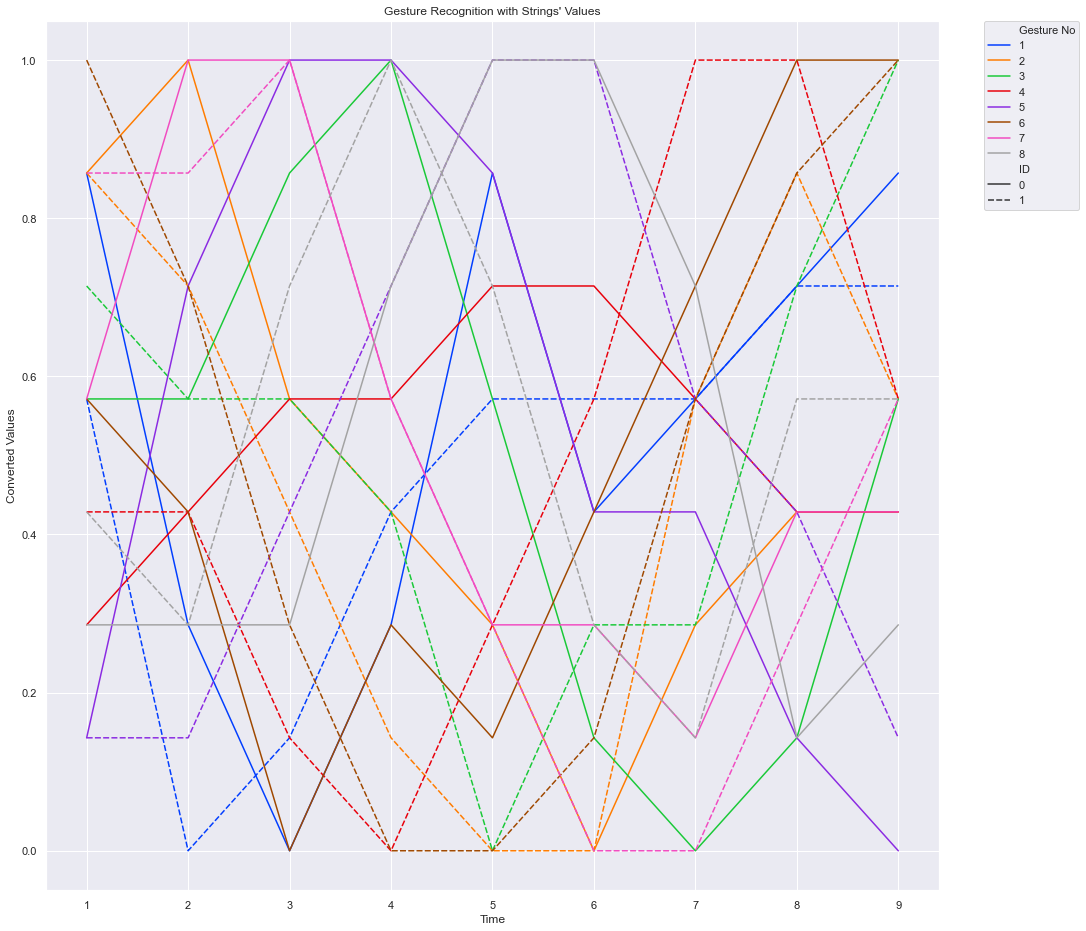

In [261]:
palette = sns.color_palette("bright", 8) 
ax = sns.lineplot(x="Time", y="string_values", style="ID", hue="Gesture No", 
             data=string_dt, palette=palette)
ax.set_title("Gesture Recognition with Strings' Values")
ax.set_ylabel("Converted Values")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# DataFrame for Regressors

In [272]:
from sklearn.preprocessing import MinMaxScaler

In [312]:
scaler=MinMaxScaler()

## Value Normalization

In [403]:
def scaler_to_1(dataset):   
    scaled=[]
    
    for i in range(8):
        current_dt=dataset[dataset["Gesture No"]==i+1]       
        for j in range(2):
            last_dt=current_dt[current_dt["ID"]==j]
            current_list=scaler.fit_transform(last_dt[["PCA Values"]]).reshape(-1)
            for k in range(len(current_list)):
                scaled.append(current_list[k])
    return(scaled)

## DataFrame for String

In [404]:
pca_datasets=[pca_1, pca_2, pca_3, pca_4,
                 pca_5, pca_6, pca_7, pca_8]

In [405]:
pca_gesture=[]
pca_id=[]
pca_value=[]
time=[]
gesture_no=1
for dt in pca_datasets:    
    for j in range(2):
        sequence=1
        for k in range(len(dt[j])):
            time.append(sequence)
            pca_gesture.append(gesture_no)
            pca_id.append(j)
            pca_value.append(dt[j]["predictions"][k])
            sequence+=1
    gesture_no+=1
    

In [406]:
pca_dt=pd.DataFrame({"Gesture No": pca_gesture, "ID": pca_id, "Time":time, "PCA Values": pca_value})

In [407]:
pca_dt["Scaled Values"]=scaler_to_1(pca_dt)

In [409]:
pca_dt

,Gesture No,ID,Time,PCA Values,Scaled Values
0,1,0,1,-45.223908,0.036758
1,1,0,2,-45.223908,0.036758
2,1,0,3,-45.223908,0.036758
3,1,0,4,-45.223908,0.036758
4,1,0,5,-45.223908,0.036758
...,...,...,...,...,...
5035,8,1,311,-2.209445,0.432216
5036,8,1,312,-2.209445,0.432216
5037,8,1,313,-2.209445,0.432216
5038,8,1,314,-2.209445,0.432216


In [411]:
pca_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5040 entries, 0 to 5039
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gesture No     5040 non-null   int64  
 1   ID             5040 non-null   int64  
 2   Time           5040 non-null   int64  
 3   PCA Values     5040 non-null   float64
 4   Scaled Values  5040 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 197.0 KB


In [410]:
ax = sns.lineplot(x="Time", y="pca_dt", style="ID", hue="Gesture No", 
             data=pca_dt, palette=palette)
ax.set_title("Gesture Recognition with Regressors' Values")
ax.set_ylabel("Normalized Values")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

ValueError: Could not interpret input 'pca_dt'